# Ensemble classifiers

In [38]:
import statistics
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from classification_utils import *
from sklearn.model_selection import cross_validate
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
import statistics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
import pickle

In [11]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

data = data.join(pd.get_dummies(data["lang"]))

train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['created_at', 'statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std', 'ar', 'da', 'de', 'el', 'en', 'es', 'fil', 'fr', 'id', 'it', 'ja', 'ko', 'nl', 'pl', 'pt', 'ru', 'sv', 'tr', 'zh']


## Bagging

In [ ]:
param_grid = {'n_estimators': np.arange(2, 50, 2),
              'max_features': np.arange(1, 20, 1),
              'max_samples': np.arange(1, 20, 1),
             }

bagging = BaggingClassifier()

grid = GridSearchCV(
    bagging,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

Fitting 5 folds for each of 8664 candidates, totalling 43320 fits
[CV 1/5] END max_features=1, max_samples=1, n_estimators=2;, score=0.531 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=1, n_estimators=2;, score=0.531 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=1, n_estimators=2;, score=0.531 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=1, n_estimators=2;, score=0.469 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=1, n_estimators=2;, score=0.532 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=1, n_estimators=4;, score=0.531 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=1, n_estimators=4;, score=0.469 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=1, n_estimators=4;, score=0.469 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=1, n_estimators=4;, score=0.469 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=1, n_estimators=4;, score=0.468 total time=   0.0s
[CV 1/5] END m

[CV 5/5] END max_features=1, max_samples=1, n_estimators=36;, score=0.468 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=1, n_estimators=38;, score=0.469 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=1, n_estimators=38;, score=0.531 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=1, n_estimators=38;, score=0.531 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=1, n_estimators=38;, score=0.531 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=1, n_estimators=38;, score=0.532 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=1, n_estimators=40;, score=0.469 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=1, n_estimators=40;, score=0.531 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=1, n_estimators=40;, score=0.531 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=1, n_estimators=40;, score=0.531 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=1, n_estimators=40;, score=0.

[CV 4/5] END max_features=1, max_samples=2, n_estimators=24;, score=0.556 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=2, n_estimators=24;, score=0.752 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=2, n_estimators=26;, score=0.584 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=2, n_estimators=26;, score=0.531 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=2, n_estimators=26;, score=0.563 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=2, n_estimators=26;, score=0.526 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=2, n_estimators=26;, score=0.431 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=2, n_estimators=28;, score=0.587 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=2, n_estimators=28;, score=0.676 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=2, n_estimators=28;, score=0.531 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=2, n_estimators=28;, score=0.

[CV 3/5] END max_features=1, max_samples=3, n_estimators=14;, score=0.469 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=3, n_estimators=14;, score=0.572 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=3, n_estimators=14;, score=0.532 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=3, n_estimators=16;, score=0.709 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=3, n_estimators=16;, score=0.531 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=3, n_estimators=16;, score=0.573 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=3, n_estimators=16;, score=0.572 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=3, n_estimators=16;, score=0.532 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=3, n_estimators=18;, score=0.670 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=3, n_estimators=18;, score=0.485 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=3, n_estimators=18;, score=0.

[CV 1/5] END max_features=1, max_samples=4, n_estimators=4;, score=0.535 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=4, n_estimators=4;, score=0.469 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=4, n_estimators=4;, score=0.484 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=4, n_estimators=4;, score=0.469 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=4, n_estimators=4;, score=0.653 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=4, n_estimators=6;, score=0.574 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=4, n_estimators=6;, score=0.570 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=4, n_estimators=6;, score=0.590 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=4, n_estimators=6;, score=0.537 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=4, n_estimators=6;, score=0.632 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=4, n_estimators=8;, score=0.743 total t

[CV 5/5] END max_features=1, max_samples=4, n_estimators=38;, score=0.619 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=4, n_estimators=40;, score=0.659 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=4, n_estimators=40;, score=0.618 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=4, n_estimators=40;, score=0.607 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=4, n_estimators=40;, score=0.683 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=4, n_estimators=40;, score=0.690 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=4, n_estimators=42;, score=0.531 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=4, n_estimators=42;, score=0.521 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=4, n_estimators=42;, score=0.577 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=4, n_estimators=42;, score=0.711 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=4, n_estimators=42;, score=0.

[CV 2/5] END max_features=1, max_samples=5, n_estimators=28;, score=0.705 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=5, n_estimators=28;, score=0.698 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=5, n_estimators=28;, score=0.693 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=5, n_estimators=28;, score=0.697 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=5, n_estimators=30;, score=0.692 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=5, n_estimators=30;, score=0.472 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=5, n_estimators=30;, score=0.526 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=5, n_estimators=30;, score=0.548 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=5, n_estimators=30;, score=0.600 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=5, n_estimators=32;, score=0.758 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=5, n_estimators=32;, score=0.

[CV 2/5] END max_features=1, max_samples=6, n_estimators=16;, score=0.680 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=6, n_estimators=16;, score=0.628 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=6, n_estimators=16;, score=0.573 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=6, n_estimators=16;, score=0.572 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=6, n_estimators=18;, score=0.634 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=6, n_estimators=18;, score=0.597 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=6, n_estimators=18;, score=0.608 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=6, n_estimators=18;, score=0.553 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=6, n_estimators=18;, score=0.613 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=6, n_estimators=20;, score=0.696 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=6, n_estimators=20;, score=0.

[CV 3/5] END max_features=1, max_samples=7, n_estimators=6;, score=0.603 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=7, n_estimators=6;, score=0.592 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=7, n_estimators=6;, score=0.532 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=7, n_estimators=8;, score=0.709 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=7, n_estimators=8;, score=0.712 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=7, n_estimators=8;, score=0.491 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=7, n_estimators=8;, score=0.651 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=7, n_estimators=8;, score=0.572 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=7, n_estimators=10;, score=0.664 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=7, n_estimators=10;, score=0.592 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=7, n_estimators=10;, score=0.534 tota

[CV 3/5] END max_features=1, max_samples=7, n_estimators=42;, score=0.703 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=7, n_estimators=42;, score=0.572 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=7, n_estimators=42;, score=0.549 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=7, n_estimators=44;, score=0.712 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=7, n_estimators=44;, score=0.697 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=7, n_estimators=44;, score=0.631 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=7, n_estimators=44;, score=0.696 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=7, n_estimators=44;, score=0.757 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=7, n_estimators=46;, score=0.745 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=7, n_estimators=46;, score=0.687 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=7, n_estimators=46;, score=0.

[CV 5/5] END max_features=1, max_samples=8, n_estimators=30;, score=0.574 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=8, n_estimators=32;, score=0.752 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=8, n_estimators=32;, score=0.744 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=8, n_estimators=32;, score=0.659 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=8, n_estimators=32;, score=0.778 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=8, n_estimators=32;, score=0.666 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=8, n_estimators=34;, score=0.734 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=8, n_estimators=34;, score=0.716 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=8, n_estimators=34;, score=0.585 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=8, n_estimators=34;, score=0.558 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=8, n_estimators=34;, score=0.

[CV 5/5] END max_features=1, max_samples=9, n_estimators=18;, score=0.709 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=9, n_estimators=20;, score=0.712 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=9, n_estimators=20;, score=0.660 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=9, n_estimators=20;, score=0.708 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=9, n_estimators=20;, score=0.486 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=9, n_estimators=20;, score=0.698 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=9, n_estimators=22;, score=0.583 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=9, n_estimators=22;, score=0.659 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=9, n_estimators=22;, score=0.732 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=9, n_estimators=22;, score=0.642 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=9, n_estimators=22;, score=0.

[CV 3/5] END max_features=1, max_samples=10, n_estimators=8;, score=0.531 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=10, n_estimators=8;, score=0.579 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=10, n_estimators=8;, score=0.675 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=10, n_estimators=10;, score=0.743 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=10, n_estimators=10;, score=0.599 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=10, n_estimators=10;, score=0.607 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=10, n_estimators=10;, score=0.546 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=10, n_estimators=10;, score=0.410 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=10, n_estimators=12;, score=0.651 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=10, n_estimators=12;, score=0.663 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=10, n_estimators=12;, 

[CV 3/5] END max_features=1, max_samples=10, n_estimators=44;, score=0.701 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=10, n_estimators=44;, score=0.721 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=10, n_estimators=44;, score=0.759 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=10, n_estimators=46;, score=0.732 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=10, n_estimators=46;, score=0.757 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=10, n_estimators=46;, score=0.720 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=10, n_estimators=46;, score=0.763 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=10, n_estimators=46;, score=0.801 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=10, n_estimators=48;, score=0.618 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=10, n_estimators=48;, score=0.694 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=10, n_estimators=48

[CV 1/5] END max_features=1, max_samples=11, n_estimators=32;, score=0.766 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=11, n_estimators=32;, score=0.718 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=11, n_estimators=32;, score=0.744 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=11, n_estimators=32;, score=0.650 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=11, n_estimators=32;, score=0.698 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=11, n_estimators=34;, score=0.682 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=11, n_estimators=34;, score=0.637 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=11, n_estimators=34;, score=0.776 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=11, n_estimators=34;, score=0.721 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=11, n_estimators=34;, score=0.637 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=11, n_estimators=36

[CV 2/5] END max_features=1, max_samples=12, n_estimators=20;, score=0.701 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=12, n_estimators=20;, score=0.610 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=12, n_estimators=20;, score=0.756 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=12, n_estimators=20;, score=0.657 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=12, n_estimators=22;, score=0.636 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=12, n_estimators=22;, score=0.708 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=12, n_estimators=22;, score=0.773 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=12, n_estimators=22;, score=0.820 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=12, n_estimators=22;, score=0.680 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=12, n_estimators=24;, score=0.745 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=12, n_estimators=24

[CV 4/5] END max_features=1, max_samples=13, n_estimators=8;, score=0.453 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=13, n_estimators=8;, score=0.813 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=13, n_estimators=10;, score=0.544 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=13, n_estimators=10;, score=0.634 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=13, n_estimators=10;, score=0.589 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=13, n_estimators=10;, score=0.748 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=13, n_estimators=10;, score=0.593 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=13, n_estimators=12;, score=0.477 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=13, n_estimators=12;, score=0.531 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=13, n_estimators=12;, score=0.635 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=13, n_estimators=12;,

[CV 2/5] END max_features=1, max_samples=13, n_estimators=44;, score=0.646 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=13, n_estimators=44;, score=0.734 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=13, n_estimators=44;, score=0.644 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=13, n_estimators=44;, score=0.691 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=13, n_estimators=46;, score=0.732 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=13, n_estimators=46;, score=0.731 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=13, n_estimators=46;, score=0.728 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=13, n_estimators=46;, score=0.657 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=13, n_estimators=46;, score=0.742 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=13, n_estimators=48;, score=0.692 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=13, n_estimators=48

[CV 5/5] END max_features=1, max_samples=14, n_estimators=30;, score=0.804 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=14, n_estimators=32;, score=0.670 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=14, n_estimators=32;, score=0.714 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=14, n_estimators=32;, score=0.729 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=14, n_estimators=32;, score=0.748 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=14, n_estimators=32;, score=0.786 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=14, n_estimators=34;, score=0.796 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=14, n_estimators=34;, score=0.685 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=14, n_estimators=34;, score=0.757 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=14, n_estimators=34;, score=0.685 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=14, n_estimators=34

[CV 3/5] END max_features=1, max_samples=15, n_estimators=18;, score=0.542 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=15, n_estimators=18;, score=0.746 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=15, n_estimators=18;, score=0.788 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=15, n_estimators=20;, score=0.751 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=15, n_estimators=20;, score=0.662 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=15, n_estimators=20;, score=0.701 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=15, n_estimators=20;, score=0.703 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=15, n_estimators=20;, score=0.775 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=15, n_estimators=22;, score=0.803 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=15, n_estimators=22;, score=0.723 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=15, n_estimators=22

[CV 2/5] END max_features=1, max_samples=16, n_estimators=8;, score=0.544 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=16, n_estimators=8;, score=0.770 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=16, n_estimators=8;, score=0.525 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=16, n_estimators=8;, score=0.689 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=16, n_estimators=10;, score=0.564 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=16, n_estimators=10;, score=0.546 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=16, n_estimators=10;, score=0.568 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=16, n_estimators=10;, score=0.570 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=16, n_estimators=10;, score=0.577 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=16, n_estimators=12;, score=0.777 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=16, n_estimators=12;, s

[CV 5/5] END max_features=1, max_samples=16, n_estimators=42;, score=0.703 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=16, n_estimators=44;, score=0.740 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=16, n_estimators=44;, score=0.713 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=16, n_estimators=44;, score=0.716 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=16, n_estimators=44;, score=0.731 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=16, n_estimators=44;, score=0.785 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=16, n_estimators=46;, score=0.763 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=16, n_estimators=46;, score=0.682 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=16, n_estimators=46;, score=0.727 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=16, n_estimators=46;, score=0.737 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=16, n_estimators=46

[CV 4/5] END max_features=1, max_samples=17, n_estimators=30;, score=0.632 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=17, n_estimators=30;, score=0.760 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=17, n_estimators=32;, score=0.796 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=17, n_estimators=32;, score=0.750 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=17, n_estimators=32;, score=0.774 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=17, n_estimators=32;, score=0.786 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=17, n_estimators=32;, score=0.664 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=17, n_estimators=34;, score=0.825 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=17, n_estimators=34;, score=0.590 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=17, n_estimators=34;, score=0.713 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=17, n_estimators=34

[CV 4/5] END max_features=1, max_samples=18, n_estimators=18;, score=0.669 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=18, n_estimators=18;, score=0.678 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=18, n_estimators=20;, score=0.671 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=18, n_estimators=20;, score=0.762 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=18, n_estimators=20;, score=0.590 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=18, n_estimators=20;, score=0.724 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=18, n_estimators=20;, score=0.693 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=18, n_estimators=22;, score=0.669 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=18, n_estimators=22;, score=0.793 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=18, n_estimators=22;, score=0.743 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=18, n_estimators=22

[CV 1/5] END max_features=1, max_samples=19, n_estimators=8;, score=0.718 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=19, n_estimators=8;, score=0.715 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=19, n_estimators=8;, score=0.757 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=19, n_estimators=8;, score=0.633 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=19, n_estimators=8;, score=0.677 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=19, n_estimators=10;, score=0.623 total time=   0.0s
[CV 2/5] END max_features=1, max_samples=19, n_estimators=10;, score=0.723 total time=   0.0s
[CV 3/5] END max_features=1, max_samples=19, n_estimators=10;, score=0.587 total time=   0.0s
[CV 4/5] END max_features=1, max_samples=19, n_estimators=10;, score=0.612 total time=   0.0s
[CV 5/5] END max_features=1, max_samples=19, n_estimators=10;, score=0.752 total time=   0.0s
[CV 1/5] END max_features=1, max_samples=19, n_estimators=12;, sc

[CV 5/5] END max_features=1, max_samples=19, n_estimators=42;, score=0.806 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=19, n_estimators=44;, score=0.806 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=19, n_estimators=44;, score=0.742 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=19, n_estimators=44;, score=0.809 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=19, n_estimators=44;, score=0.719 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=19, n_estimators=44;, score=0.764 total time=   0.1s
[CV 1/5] END max_features=1, max_samples=19, n_estimators=46;, score=0.693 total time=   0.1s
[CV 2/5] END max_features=1, max_samples=19, n_estimators=46;, score=0.638 total time=   0.1s
[CV 3/5] END max_features=1, max_samples=19, n_estimators=46;, score=0.776 total time=   0.1s
[CV 4/5] END max_features=1, max_samples=19, n_estimators=46;, score=0.776 total time=   0.1s
[CV 5/5] END max_features=1, max_samples=19, n_estimators=46

[CV 4/5] END max_features=2, max_samples=1, n_estimators=30;, score=0.531 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=1, n_estimators=30;, score=0.468 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=1, n_estimators=32;, score=0.469 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=1, n_estimators=32;, score=0.531 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=1, n_estimators=32;, score=0.531 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=1, n_estimators=32;, score=0.531 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=1, n_estimators=32;, score=0.468 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=1, n_estimators=34;, score=0.469 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=1, n_estimators=34;, score=0.469 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=1, n_estimators=34;, score=0.469 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=1, n_estimators=34;, score=0.

[CV 4/5] END max_features=2, max_samples=2, n_estimators=18;, score=0.565 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=2, n_estimators=18;, score=0.591 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=2, n_estimators=20;, score=0.632 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=2, n_estimators=20;, score=0.477 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=2, n_estimators=20;, score=0.408 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=2, n_estimators=20;, score=0.530 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=2, n_estimators=20;, score=0.561 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=2, n_estimators=22;, score=0.529 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=2, n_estimators=22;, score=0.581 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=2, n_estimators=22;, score=0.469 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=2, n_estimators=22;, score=0.

[CV 1/5] END max_features=2, max_samples=3, n_estimators=8;, score=0.570 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=3, n_estimators=8;, score=0.690 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=3, n_estimators=8;, score=0.554 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=3, n_estimators=8;, score=0.701 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=3, n_estimators=8;, score=0.532 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=3, n_estimators=10;, score=0.715 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=3, n_estimators=10;, score=0.600 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=3, n_estimators=10;, score=0.531 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=3, n_estimators=10;, score=0.594 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=3, n_estimators=10;, score=0.577 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=3, n_estimators=12;, score=0.664 t

[CV 2/5] END max_features=2, max_samples=3, n_estimators=44;, score=0.649 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=3, n_estimators=44;, score=0.534 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=3, n_estimators=44;, score=0.493 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=3, n_estimators=44;, score=0.548 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=3, n_estimators=46;, score=0.751 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=3, n_estimators=46;, score=0.547 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=3, n_estimators=46;, score=0.624 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=3, n_estimators=46;, score=0.644 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=3, n_estimators=46;, score=0.731 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=3, n_estimators=48;, score=0.588 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=3, n_estimators=48;, score=0.

[CV 3/5] END max_features=2, max_samples=4, n_estimators=32;, score=0.665 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=4, n_estimators=32;, score=0.688 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=4, n_estimators=32;, score=0.625 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=4, n_estimators=34;, score=0.754 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=4, n_estimators=34;, score=0.640 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=4, n_estimators=34;, score=0.722 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=4, n_estimators=34;, score=0.744 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=4, n_estimators=34;, score=0.701 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=4, n_estimators=36;, score=0.706 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=4, n_estimators=36;, score=0.748 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=4, n_estimators=36;, score=0.

[CV 1/5] END max_features=2, max_samples=5, n_estimators=22;, score=0.605 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=5, n_estimators=22;, score=0.740 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=5, n_estimators=22;, score=0.746 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=5, n_estimators=22;, score=0.764 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=5, n_estimators=22;, score=0.701 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=5, n_estimators=24;, score=0.798 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=5, n_estimators=24;, score=0.663 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=5, n_estimators=24;, score=0.657 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=5, n_estimators=24;, score=0.669 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=5, n_estimators=24;, score=0.584 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=5, n_estimators=26;, score=0.

[CV 1/5] END max_features=2, max_samples=6, n_estimators=10;, score=0.695 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=6, n_estimators=10;, score=0.507 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=6, n_estimators=10;, score=0.646 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=6, n_estimators=10;, score=0.713 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=6, n_estimators=10;, score=0.543 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=6, n_estimators=12;, score=0.670 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=6, n_estimators=12;, score=0.675 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=6, n_estimators=12;, score=0.711 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=6, n_estimators=12;, score=0.672 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=6, n_estimators=12;, score=0.572 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=6, n_estimators=14;, score=0.

[CV 2/5] END max_features=2, max_samples=6, n_estimators=46;, score=0.654 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=6, n_estimators=46;, score=0.756 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=6, n_estimators=46;, score=0.765 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=6, n_estimators=46;, score=0.763 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=6, n_estimators=48;, score=0.782 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=6, n_estimators=48;, score=0.629 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=6, n_estimators=48;, score=0.749 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=6, n_estimators=48;, score=0.794 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=6, n_estimators=48;, score=0.698 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=7, n_estimators=2;, score=0.591 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=7, n_estimators=2;, score=0.48

[CV 2/5] END max_features=2, max_samples=7, n_estimators=34;, score=0.738 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=7, n_estimators=34;, score=0.699 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=7, n_estimators=34;, score=0.688 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=7, n_estimators=34;, score=0.713 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=7, n_estimators=36;, score=0.781 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=7, n_estimators=36;, score=0.774 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=7, n_estimators=36;, score=0.689 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=7, n_estimators=36;, score=0.678 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=7, n_estimators=36;, score=0.703 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=7, n_estimators=38;, score=0.727 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=7, n_estimators=38;, score=0.

[CV 4/5] END max_features=2, max_samples=8, n_estimators=22;, score=0.704 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=8, n_estimators=22;, score=0.729 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=8, n_estimators=24;, score=0.723 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=8, n_estimators=24;, score=0.696 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=8, n_estimators=24;, score=0.661 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=8, n_estimators=24;, score=0.749 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=8, n_estimators=24;, score=0.656 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=8, n_estimators=26;, score=0.669 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=8, n_estimators=26;, score=0.716 total time=   0.2s
[CV 3/5] END max_features=2, max_samples=8, n_estimators=26;, score=0.776 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=8, n_estimators=26;, score=0.

[CV 3/5] END max_features=2, max_samples=9, n_estimators=12;, score=0.618 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=9, n_estimators=12;, score=0.743 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=9, n_estimators=12;, score=0.657 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=9, n_estimators=14;, score=0.705 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=9, n_estimators=14;, score=0.809 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=9, n_estimators=14;, score=0.588 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=9, n_estimators=14;, score=0.695 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=9, n_estimators=14;, score=0.665 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=9, n_estimators=16;, score=0.744 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=9, n_estimators=16;, score=0.693 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=9, n_estimators=16;, score=0.

[CV 2/5] END max_features=2, max_samples=9, n_estimators=48;, score=0.761 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=9, n_estimators=48;, score=0.783 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=9, n_estimators=48;, score=0.773 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=9, n_estimators=48;, score=0.785 total time=   0.2s
[CV 1/5] END max_features=2, max_samples=10, n_estimators=2;, score=0.531 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=10, n_estimators=2;, score=0.531 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=10, n_estimators=2;, score=0.492 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=10, n_estimators=2;, score=0.668 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=10, n_estimators=2;, score=0.616 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=10, n_estimators=4;, score=0.637 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=10, n_estimators=4;, score=0.

[CV 2/5] END max_features=2, max_samples=10, n_estimators=36;, score=0.777 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=10, n_estimators=36;, score=0.751 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=10, n_estimators=36;, score=0.729 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=10, n_estimators=36;, score=0.730 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=10, n_estimators=38;, score=0.809 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=10, n_estimators=38;, score=0.796 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=10, n_estimators=38;, score=0.675 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=10, n_estimators=38;, score=0.808 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=10, n_estimators=38;, score=0.725 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=10, n_estimators=40;, score=0.729 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=10, n_estimators=40

[CV 5/5] END max_features=2, max_samples=11, n_estimators=22;, score=0.802 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=11, n_estimators=24;, score=0.788 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=11, n_estimators=24;, score=0.788 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=11, n_estimators=24;, score=0.785 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=11, n_estimators=24;, score=0.736 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=11, n_estimators=24;, score=0.791 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=11, n_estimators=26;, score=0.777 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=11, n_estimators=26;, score=0.661 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=11, n_estimators=26;, score=0.698 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=11, n_estimators=26;, score=0.755 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=11, n_estimators=26

[CV 2/5] END max_features=2, max_samples=12, n_estimators=12;, score=0.800 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=12, n_estimators=12;, score=0.830 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=12, n_estimators=12;, score=0.614 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=12, n_estimators=12;, score=0.567 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=12, n_estimators=14;, score=0.755 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=12, n_estimators=14;, score=0.772 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=12, n_estimators=14;, score=0.746 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=12, n_estimators=14;, score=0.636 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=12, n_estimators=14;, score=0.731 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=12, n_estimators=16;, score=0.791 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=12, n_estimators=16

[CV 2/5] END max_features=2, max_samples=12, n_estimators=48;, score=0.788 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=12, n_estimators=48;, score=0.749 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=12, n_estimators=48;, score=0.788 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=12, n_estimators=48;, score=0.800 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=13, n_estimators=2;, score=0.639 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=13, n_estimators=2;, score=0.620 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=13, n_estimators=2;, score=0.572 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=13, n_estimators=2;, score=0.577 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=13, n_estimators=2;, score=0.506 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=13, n_estimators=4;, score=0.734 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=13, n_estimators=4;, scor

[CV 2/5] END max_features=2, max_samples=13, n_estimators=36;, score=0.727 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=13, n_estimators=36;, score=0.739 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=13, n_estimators=36;, score=0.780 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=13, n_estimators=36;, score=0.812 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=13, n_estimators=38;, score=0.773 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=13, n_estimators=38;, score=0.742 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=13, n_estimators=38;, score=0.778 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=13, n_estimators=38;, score=0.749 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=13, n_estimators=38;, score=0.779 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=13, n_estimators=40;, score=0.806 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=13, n_estimators=40

[CV 2/5] END max_features=2, max_samples=14, n_estimators=24;, score=0.800 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=14, n_estimators=24;, score=0.782 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=14, n_estimators=24;, score=0.747 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=14, n_estimators=24;, score=0.727 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=14, n_estimators=26;, score=0.785 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=14, n_estimators=26;, score=0.762 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=14, n_estimators=26;, score=0.785 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=14, n_estimators=26;, score=0.750 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=14, n_estimators=26;, score=0.764 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=14, n_estimators=28;, score=0.767 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=14, n_estimators=28

[CV 2/5] END max_features=2, max_samples=15, n_estimators=14;, score=0.783 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=15, n_estimators=14;, score=0.749 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=15, n_estimators=14;, score=0.639 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=15, n_estimators=14;, score=0.727 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=15, n_estimators=16;, score=0.704 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=15, n_estimators=16;, score=0.778 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=15, n_estimators=16;, score=0.720 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=15, n_estimators=16;, score=0.709 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=15, n_estimators=16;, score=0.792 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=15, n_estimators=18;, score=0.762 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=15, n_estimators=18

[CV 3/5] END max_features=2, max_samples=16, n_estimators=4;, score=0.546 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=16, n_estimators=4;, score=0.474 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=16, n_estimators=4;, score=0.803 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=16, n_estimators=6;, score=0.568 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=16, n_estimators=6;, score=0.700 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=16, n_estimators=6;, score=0.786 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=16, n_estimators=6;, score=0.593 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=16, n_estimators=6;, score=0.554 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=16, n_estimators=8;, score=0.637 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=16, n_estimators=8;, score=0.702 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=16, n_estimators=8;, score=0.

[CV 3/5] END max_features=2, max_samples=16, n_estimators=40;, score=0.789 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=16, n_estimators=40;, score=0.763 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=16, n_estimators=40;, score=0.757 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=16, n_estimators=42;, score=0.802 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=16, n_estimators=42;, score=0.783 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=16, n_estimators=42;, score=0.708 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=16, n_estimators=42;, score=0.780 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=16, n_estimators=42;, score=0.842 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=16, n_estimators=44;, score=0.799 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=16, n_estimators=44;, score=0.801 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=16, n_estimators=44

[CV 2/5] END max_features=2, max_samples=17, n_estimators=28;, score=0.770 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=17, n_estimators=28;, score=0.777 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=17, n_estimators=28;, score=0.773 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=17, n_estimators=28;, score=0.730 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=17, n_estimators=30;, score=0.778 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=17, n_estimators=30;, score=0.727 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=17, n_estimators=30;, score=0.759 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=17, n_estimators=30;, score=0.770 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=17, n_estimators=30;, score=0.732 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=17, n_estimators=32;, score=0.809 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=17, n_estimators=32

[CV 4/5] END max_features=2, max_samples=18, n_estimators=16;, score=0.786 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=18, n_estimators=16;, score=0.721 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=18, n_estimators=18;, score=0.726 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=18, n_estimators=18;, score=0.802 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=18, n_estimators=18;, score=0.747 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=18, n_estimators=18;, score=0.730 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=18, n_estimators=18;, score=0.719 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=18, n_estimators=20;, score=0.725 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=18, n_estimators=20;, score=0.755 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=18, n_estimators=20;, score=0.695 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=18, n_estimators=20

[CV 1/5] END max_features=2, max_samples=19, n_estimators=6;, score=0.668 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=19, n_estimators=6;, score=0.735 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=19, n_estimators=6;, score=0.743 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=19, n_estimators=6;, score=0.732 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=19, n_estimators=6;, score=0.690 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=19, n_estimators=8;, score=0.655 total time=   0.0s
[CV 2/5] END max_features=2, max_samples=19, n_estimators=8;, score=0.706 total time=   0.0s
[CV 3/5] END max_features=2, max_samples=19, n_estimators=8;, score=0.631 total time=   0.0s
[CV 4/5] END max_features=2, max_samples=19, n_estimators=8;, score=0.717 total time=   0.0s
[CV 5/5] END max_features=2, max_samples=19, n_estimators=8;, score=0.648 total time=   0.0s
[CV 1/5] END max_features=2, max_samples=19, n_estimators=10;, score=0

[CV 4/5] END max_features=2, max_samples=19, n_estimators=40;, score=0.757 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=19, n_estimators=40;, score=0.793 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=19, n_estimators=42;, score=0.770 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=19, n_estimators=42;, score=0.775 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=19, n_estimators=42;, score=0.757 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=19, n_estimators=42;, score=0.790 total time=   0.1s
[CV 5/5] END max_features=2, max_samples=19, n_estimators=42;, score=0.786 total time=   0.1s
[CV 1/5] END max_features=2, max_samples=19, n_estimators=44;, score=0.782 total time=   0.1s
[CV 2/5] END max_features=2, max_samples=19, n_estimators=44;, score=0.742 total time=   0.1s
[CV 3/5] END max_features=2, max_samples=19, n_estimators=44;, score=0.798 total time=   0.1s
[CV 4/5] END max_features=2, max_samples=19, n_estimators=44

[CV 4/5] END max_features=3, max_samples=1, n_estimators=28;, score=0.469 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=1, n_estimators=28;, score=0.532 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=1, n_estimators=30;, score=0.531 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=1, n_estimators=30;, score=0.531 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=1, n_estimators=30;, score=0.531 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=1, n_estimators=30;, score=0.531 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=1, n_estimators=30;, score=0.468 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=1, n_estimators=32;, score=0.469 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=1, n_estimators=32;, score=0.531 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=1, n_estimators=32;, score=0.469 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=1, n_estimators=32;, score=0.

[CV 4/5] END max_features=3, max_samples=2, n_estimators=16;, score=0.469 total time=   0.0s
[CV 5/5] END max_features=3, max_samples=2, n_estimators=16;, score=0.610 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=2, n_estimators=18;, score=0.520 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=2, n_estimators=18;, score=0.499 total time=   0.0s
[CV 3/5] END max_features=3, max_samples=2, n_estimators=18;, score=0.647 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=2, n_estimators=18;, score=0.531 total time=   0.0s
[CV 5/5] END max_features=3, max_samples=2, n_estimators=18;, score=0.743 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=2, n_estimators=20;, score=0.737 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=2, n_estimators=20;, score=0.700 total time=   0.0s
[CV 3/5] END max_features=3, max_samples=2, n_estimators=20;, score=0.604 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=2, n_estimators=20;, score=0.

[CV 5/5] END max_features=3, max_samples=3, n_estimators=6;, score=0.655 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=3, n_estimators=8;, score=0.642 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=3, n_estimators=8;, score=0.531 total time=   0.0s
[CV 3/5] END max_features=3, max_samples=3, n_estimators=8;, score=0.576 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=3, n_estimators=8;, score=0.703 total time=   0.0s
[CV 5/5] END max_features=3, max_samples=3, n_estimators=8;, score=0.532 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=3, n_estimators=10;, score=0.636 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=3, n_estimators=10;, score=0.747 total time=   0.0s
[CV 3/5] END max_features=3, max_samples=3, n_estimators=10;, score=0.675 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=3, n_estimators=10;, score=0.549 total time=   0.0s
[CV 5/5] END max_features=3, max_samples=3, n_estimators=10;, score=0.714 to

[CV 1/5] END max_features=3, max_samples=3, n_estimators=44;, score=0.649 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=3, n_estimators=44;, score=0.726 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=3, n_estimators=44;, score=0.656 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=3, n_estimators=44;, score=0.711 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=3, n_estimators=44;, score=0.767 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=3, n_estimators=46;, score=0.675 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=3, n_estimators=46;, score=0.556 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=3, n_estimators=46;, score=0.674 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=3, n_estimators=46;, score=0.688 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=3, n_estimators=46;, score=0.641 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=3, n_estimators=48;, score=0.

[CV 1/5] END max_features=3, max_samples=4, n_estimators=32;, score=0.654 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=4, n_estimators=32;, score=0.697 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=4, n_estimators=32;, score=0.695 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=4, n_estimators=32;, score=0.647 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=4, n_estimators=32;, score=0.803 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=4, n_estimators=34;, score=0.764 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=4, n_estimators=34;, score=0.664 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=4, n_estimators=34;, score=0.695 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=4, n_estimators=34;, score=0.753 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=4, n_estimators=34;, score=0.716 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=4, n_estimators=36;, score=0.

[CV 3/5] END max_features=3, max_samples=5, n_estimators=20;, score=0.636 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=5, n_estimators=20;, score=0.683 total time=   0.0s
[CV 5/5] END max_features=3, max_samples=5, n_estimators=20;, score=0.691 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=5, n_estimators=22;, score=0.723 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=5, n_estimators=22;, score=0.762 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=5, n_estimators=22;, score=0.665 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=5, n_estimators=22;, score=0.730 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=5, n_estimators=22;, score=0.652 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=5, n_estimators=24;, score=0.795 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=5, n_estimators=24;, score=0.770 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=5, n_estimators=24;, score=0.

[CV 3/5] END max_features=3, max_samples=6, n_estimators=8;, score=0.702 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=6, n_estimators=8;, score=0.690 total time=   0.0s
[CV 5/5] END max_features=3, max_samples=6, n_estimators=8;, score=0.707 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=6, n_estimators=10;, score=0.624 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=6, n_estimators=10;, score=0.729 total time=   0.0s
[CV 3/5] END max_features=3, max_samples=6, n_estimators=10;, score=0.648 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=6, n_estimators=10;, score=0.667 total time=   0.0s
[CV 5/5] END max_features=3, max_samples=6, n_estimators=10;, score=0.725 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=6, n_estimators=12;, score=0.691 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=6, n_estimators=12;, score=0.627 total time=   0.0s
[CV 3/5] END max_features=3, max_samples=6, n_estimators=12;, score=0.642

[CV 4/5] END max_features=3, max_samples=6, n_estimators=44;, score=0.708 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=6, n_estimators=44;, score=0.806 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=6, n_estimators=46;, score=0.743 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=6, n_estimators=46;, score=0.770 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=6, n_estimators=46;, score=0.744 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=6, n_estimators=46;, score=0.762 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=6, n_estimators=46;, score=0.725 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=6, n_estimators=48;, score=0.731 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=6, n_estimators=48;, score=0.783 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=6, n_estimators=48;, score=0.746 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=6, n_estimators=48;, score=0.

[CV 5/5] END max_features=3, max_samples=7, n_estimators=32;, score=0.801 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=7, n_estimators=34;, score=0.775 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=7, n_estimators=34;, score=0.723 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=7, n_estimators=34;, score=0.740 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=7, n_estimators=34;, score=0.695 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=7, n_estimators=34;, score=0.775 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=7, n_estimators=36;, score=0.791 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=7, n_estimators=36;, score=0.784 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=7, n_estimators=36;, score=0.726 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=7, n_estimators=36;, score=0.768 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=7, n_estimators=36;, score=0.

[CV 2/5] END max_features=3, max_samples=8, n_estimators=22;, score=0.649 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=8, n_estimators=22;, score=0.701 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=8, n_estimators=22;, score=0.736 total time=   0.0s
[CV 5/5] END max_features=3, max_samples=8, n_estimators=22;, score=0.767 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=8, n_estimators=24;, score=0.590 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=8, n_estimators=24;, score=0.732 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=8, n_estimators=24;, score=0.755 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=8, n_estimators=24;, score=0.775 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=8, n_estimators=24;, score=0.781 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=8, n_estimators=26;, score=0.783 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=8, n_estimators=26;, score=0.

[CV 5/5] END max_features=3, max_samples=9, n_estimators=10;, score=0.678 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=9, n_estimators=12;, score=0.759 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=9, n_estimators=12;, score=0.619 total time=   0.0s
[CV 3/5] END max_features=3, max_samples=9, n_estimators=12;, score=0.662 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=9, n_estimators=12;, score=0.769 total time=   0.0s
[CV 5/5] END max_features=3, max_samples=9, n_estimators=12;, score=0.654 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=9, n_estimators=14;, score=0.667 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=9, n_estimators=14;, score=0.789 total time=   0.0s
[CV 3/5] END max_features=3, max_samples=9, n_estimators=14;, score=0.716 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=9, n_estimators=14;, score=0.678 total time=   0.0s
[CV 5/5] END max_features=3, max_samples=9, n_estimators=14;, score=0.

[CV 4/5] END max_features=3, max_samples=9, n_estimators=46;, score=0.790 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=9, n_estimators=46;, score=0.811 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=9, n_estimators=48;, score=0.799 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=9, n_estimators=48;, score=0.781 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=9, n_estimators=48;, score=0.788 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=9, n_estimators=48;, score=0.786 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=9, n_estimators=48;, score=0.822 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=10, n_estimators=2;, score=0.646 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=10, n_estimators=2;, score=0.499 total time=   0.0s
[CV 3/5] END max_features=3, max_samples=10, n_estimators=2;, score=0.561 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=10, n_estimators=2;, score=0.

[CV 3/5] END max_features=3, max_samples=10, n_estimators=34;, score=0.742 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=10, n_estimators=34;, score=0.777 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=10, n_estimators=34;, score=0.807 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=10, n_estimators=36;, score=0.763 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=10, n_estimators=36;, score=0.788 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=10, n_estimators=36;, score=0.800 total time=   0.3s
[CV 4/5] END max_features=3, max_samples=10, n_estimators=36;, score=0.791 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=10, n_estimators=36;, score=0.825 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=10, n_estimators=38;, score=0.801 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=10, n_estimators=38;, score=0.687 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=10, n_estimators=38

[CV 5/5] END max_features=3, max_samples=11, n_estimators=22;, score=0.810 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=11, n_estimators=24;, score=0.749 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=11, n_estimators=24;, score=0.763 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=11, n_estimators=24;, score=0.772 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=11, n_estimators=24;, score=0.775 total time=   0.0s
[CV 5/5] END max_features=3, max_samples=11, n_estimators=24;, score=0.802 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=11, n_estimators=26;, score=0.837 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=11, n_estimators=26;, score=0.765 total time=   0.0s
[CV 3/5] END max_features=3, max_samples=11, n_estimators=26;, score=0.804 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=11, n_estimators=26;, score=0.770 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=11, n_estimators=26

[CV 3/5] END max_features=3, max_samples=12, n_estimators=12;, score=0.720 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=12, n_estimators=12;, score=0.732 total time=   0.0s
[CV 5/5] END max_features=3, max_samples=12, n_estimators=12;, score=0.718 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=12, n_estimators=14;, score=0.754 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=12, n_estimators=14;, score=0.702 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=12, n_estimators=14;, score=0.721 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=12, n_estimators=14;, score=0.737 total time=   0.0s
[CV 5/5] END max_features=3, max_samples=12, n_estimators=14;, score=0.764 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=12, n_estimators=16;, score=0.738 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=12, n_estimators=16;, score=0.766 total time=   0.0s
[CV 3/5] END max_features=3, max_samples=12, n_estimators=16

[CV 2/5] END max_features=3, max_samples=12, n_estimators=48;, score=0.766 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=12, n_estimators=48;, score=0.821 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=12, n_estimators=48;, score=0.763 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=12, n_estimators=48;, score=0.813 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=13, n_estimators=2;, score=0.832 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=13, n_estimators=2;, score=0.574 total time=   0.0s
[CV 3/5] END max_features=3, max_samples=13, n_estimators=2;, score=0.652 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=13, n_estimators=2;, score=0.553 total time=   0.0s
[CV 5/5] END max_features=3, max_samples=13, n_estimators=2;, score=0.512 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=13, n_estimators=4;, score=0.620 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=13, n_estimators=4;, scor

[CV 5/5] END max_features=3, max_samples=13, n_estimators=34;, score=0.759 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=13, n_estimators=36;, score=0.729 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=13, n_estimators=36;, score=0.786 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=13, n_estimators=36;, score=0.790 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=13, n_estimators=36;, score=0.798 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=13, n_estimators=36;, score=0.745 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=13, n_estimators=38;, score=0.803 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=13, n_estimators=38;, score=0.738 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=13, n_estimators=38;, score=0.775 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=13, n_estimators=38;, score=0.819 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=13, n_estimators=38

[CV 3/5] END max_features=3, max_samples=14, n_estimators=22;, score=0.711 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=14, n_estimators=22;, score=0.753 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=14, n_estimators=22;, score=0.806 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=14, n_estimators=24;, score=0.788 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=14, n_estimators=24;, score=0.746 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=14, n_estimators=24;, score=0.773 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=14, n_estimators=24;, score=0.748 total time=   0.0s
[CV 5/5] END max_features=3, max_samples=14, n_estimators=24;, score=0.823 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=14, n_estimators=26;, score=0.786 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=14, n_estimators=26;, score=0.806 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=14, n_estimators=26

[CV 5/5] END max_features=3, max_samples=15, n_estimators=10;, score=0.778 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=15, n_estimators=12;, score=0.557 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=15, n_estimators=12;, score=0.761 total time=   0.0s
[CV 3/5] END max_features=3, max_samples=15, n_estimators=12;, score=0.688 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=15, n_estimators=12;, score=0.783 total time=   0.0s
[CV 5/5] END max_features=3, max_samples=15, n_estimators=12;, score=0.769 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=15, n_estimators=14;, score=0.785 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=15, n_estimators=14;, score=0.760 total time=   0.0s
[CV 3/5] END max_features=3, max_samples=15, n_estimators=14;, score=0.789 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=15, n_estimators=14;, score=0.760 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=15, n_estimators=14

[CV 3/5] END max_features=3, max_samples=15, n_estimators=46;, score=0.787 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=15, n_estimators=46;, score=0.789 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=15, n_estimators=46;, score=0.837 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=15, n_estimators=48;, score=0.804 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=15, n_estimators=48;, score=0.815 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=15, n_estimators=48;, score=0.807 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=15, n_estimators=48;, score=0.814 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=15, n_estimators=48;, score=0.792 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=16, n_estimators=2;, score=0.651 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=16, n_estimators=2;, score=0.644 total time=   0.0s
[CV 3/5] END max_features=3, max_samples=16, n_estimators=2;, 

[CV 2/5] END max_features=3, max_samples=16, n_estimators=34;, score=0.796 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=16, n_estimators=34;, score=0.771 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=16, n_estimators=34;, score=0.771 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=16, n_estimators=34;, score=0.810 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=16, n_estimators=36;, score=0.767 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=16, n_estimators=36;, score=0.787 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=16, n_estimators=36;, score=0.815 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=16, n_estimators=36;, score=0.829 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=16, n_estimators=36;, score=0.811 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=16, n_estimators=38;, score=0.811 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=16, n_estimators=38

[CV 4/5] END max_features=3, max_samples=17, n_estimators=22;, score=0.777 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=17, n_estimators=22;, score=0.816 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=17, n_estimators=24;, score=0.711 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=17, n_estimators=24;, score=0.794 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=17, n_estimators=24;, score=0.810 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=17, n_estimators=24;, score=0.782 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=17, n_estimators=24;, score=0.834 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=17, n_estimators=26;, score=0.782 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=17, n_estimators=26;, score=0.768 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=17, n_estimators=26;, score=0.818 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=17, n_estimators=26

[CV 2/5] END max_features=3, max_samples=18, n_estimators=10;, score=0.712 total time=   0.0s
[CV 3/5] END max_features=3, max_samples=18, n_estimators=10;, score=0.763 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=18, n_estimators=10;, score=0.839 total time=   0.0s
[CV 5/5] END max_features=3, max_samples=18, n_estimators=10;, score=0.682 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=18, n_estimators=12;, score=0.682 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=18, n_estimators=12;, score=0.757 total time=   0.0s
[CV 3/5] END max_features=3, max_samples=18, n_estimators=12;, score=0.764 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=18, n_estimators=12;, score=0.672 total time=   0.0s
[CV 5/5] END max_features=3, max_samples=18, n_estimators=12;, score=0.800 total time=   0.0s
[CV 1/5] END max_features=3, max_samples=18, n_estimators=14;, score=0.742 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=18, n_estimators=14

[CV 2/5] END max_features=3, max_samples=18, n_estimators=46;, score=0.792 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=18, n_estimators=46;, score=0.831 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=18, n_estimators=46;, score=0.801 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=18, n_estimators=46;, score=0.812 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=18, n_estimators=48;, score=0.824 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=18, n_estimators=48;, score=0.799 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=18, n_estimators=48;, score=0.819 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=18, n_estimators=48;, score=0.798 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=18, n_estimators=48;, score=0.752 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=19, n_estimators=2;, score=0.568 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=19, n_estimators=2;,

[CV 1/5] END max_features=3, max_samples=19, n_estimators=34;, score=0.798 total time=   0.1s
[CV 2/5] END max_features=3, max_samples=19, n_estimators=34;, score=0.786 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=19, n_estimators=34;, score=0.807 total time=   0.0s
[CV 4/5] END max_features=3, max_samples=19, n_estimators=34;, score=0.778 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=19, n_estimators=34;, score=0.796 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=19, n_estimators=36;, score=0.804 total time=   0.0s
[CV 2/5] END max_features=3, max_samples=19, n_estimators=36;, score=0.811 total time=   0.1s
[CV 3/5] END max_features=3, max_samples=19, n_estimators=36;, score=0.774 total time=   0.1s
[CV 4/5] END max_features=3, max_samples=19, n_estimators=36;, score=0.784 total time=   0.1s
[CV 5/5] END max_features=3, max_samples=19, n_estimators=36;, score=0.805 total time=   0.1s
[CV 1/5] END max_features=3, max_samples=19, n_estimators=38

[CV 5/5] END max_features=4, max_samples=1, n_estimators=20;, score=0.468 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=1, n_estimators=22;, score=0.469 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=1, n_estimators=22;, score=0.531 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=1, n_estimators=22;, score=0.469 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=1, n_estimators=22;, score=0.531 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=1, n_estimators=22;, score=0.468 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=1, n_estimators=24;, score=0.531 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=1, n_estimators=24;, score=0.531 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=1, n_estimators=24;, score=0.469 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=1, n_estimators=24;, score=0.531 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=1, n_estimators=24;, score=0.

[CV 5/5] END max_features=4, max_samples=2, n_estimators=10;, score=0.653 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=2, n_estimators=12;, score=0.645 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=2, n_estimators=12;, score=0.729 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=2, n_estimators=12;, score=0.509 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=2, n_estimators=12;, score=0.469 total time=   0.0s
[CV 5/5] END max_features=4, max_samples=2, n_estimators=12;, score=0.533 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=2, n_estimators=14;, score=0.545 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=2, n_estimators=14;, score=0.667 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=2, n_estimators=14;, score=0.538 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=2, n_estimators=14;, score=0.602 total time=   0.2s
[CV 5/5] END max_features=4, max_samples=2, n_estimators=14;, score=0.

[CV 1/5] END max_features=4, max_samples=2, n_estimators=48;, score=0.532 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=2, n_estimators=48;, score=0.541 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=2, n_estimators=48;, score=0.545 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=2, n_estimators=48;, score=0.572 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=2, n_estimators=48;, score=0.608 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=3, n_estimators=2;, score=0.706 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=3, n_estimators=2;, score=0.520 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=3, n_estimators=2;, score=0.532 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=3, n_estimators=2;, score=0.504 total time=   0.0s
[CV 5/5] END max_features=4, max_samples=3, n_estimators=2;, score=0.489 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=3, n_estimators=4;, score=0.642 to

[CV 5/5] END max_features=4, max_samples=3, n_estimators=34;, score=0.594 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=3, n_estimators=36;, score=0.759 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=3, n_estimators=36;, score=0.786 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=3, n_estimators=36;, score=0.619 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=3, n_estimators=36;, score=0.785 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=3, n_estimators=36;, score=0.773 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=3, n_estimators=38;, score=0.713 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=3, n_estimators=38;, score=0.699 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=3, n_estimators=38;, score=0.713 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=3, n_estimators=38;, score=0.600 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=3, n_estimators=38;, score=0.

[CV 4/5] END max_features=4, max_samples=4, n_estimators=22;, score=0.637 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=4, n_estimators=22;, score=0.751 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=4, n_estimators=24;, score=0.727 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=4, n_estimators=24;, score=0.658 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=4, n_estimators=24;, score=0.723 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=4, n_estimators=24;, score=0.737 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=4, n_estimators=24;, score=0.695 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=4, n_estimators=26;, score=0.653 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=4, n_estimators=26;, score=0.757 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=4, n_estimators=26;, score=0.634 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=4, n_estimators=26;, score=0.

[CV 2/5] END max_features=4, max_samples=5, n_estimators=12;, score=0.667 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=5, n_estimators=12;, score=0.759 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=5, n_estimators=12;, score=0.613 total time=   0.0s
[CV 5/5] END max_features=4, max_samples=5, n_estimators=12;, score=0.723 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=5, n_estimators=14;, score=0.646 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=5, n_estimators=14;, score=0.764 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=5, n_estimators=14;, score=0.663 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=5, n_estimators=14;, score=0.704 total time=   0.0s
[CV 5/5] END max_features=4, max_samples=5, n_estimators=14;, score=0.626 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=5, n_estimators=16;, score=0.674 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=5, n_estimators=16;, score=0.

[CV 1/5] END max_features=4, max_samples=5, n_estimators=48;, score=0.779 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=5, n_estimators=48;, score=0.736 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=5, n_estimators=48;, score=0.742 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=5, n_estimators=48;, score=0.782 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=5, n_estimators=48;, score=0.773 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=6, n_estimators=2;, score=0.778 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=6, n_estimators=2;, score=0.469 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=6, n_estimators=2;, score=0.580 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=6, n_estimators=2;, score=0.633 total time=   0.0s
[CV 5/5] END max_features=4, max_samples=6, n_estimators=2;, score=0.440 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=6, n_estimators=4;, score=0.649 to

[CV 2/5] END max_features=4, max_samples=6, n_estimators=36;, score=0.749 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=6, n_estimators=36;, score=0.682 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=6, n_estimators=36;, score=0.714 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=6, n_estimators=36;, score=0.791 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=6, n_estimators=38;, score=0.601 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=6, n_estimators=38;, score=0.773 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=6, n_estimators=38;, score=0.701 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=6, n_estimators=38;, score=0.790 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=6, n_estimators=38;, score=0.726 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=6, n_estimators=40;, score=0.788 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=6, n_estimators=40;, score=0.

[CV 1/5] END max_features=4, max_samples=7, n_estimators=24;, score=0.750 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=7, n_estimators=24;, score=0.742 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=7, n_estimators=24;, score=0.722 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=7, n_estimators=24;, score=0.680 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=7, n_estimators=24;, score=0.758 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=7, n_estimators=26;, score=0.719 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=7, n_estimators=26;, score=0.801 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=7, n_estimators=26;, score=0.696 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=7, n_estimators=26;, score=0.733 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=7, n_estimators=26;, score=0.764 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=7, n_estimators=28;, score=0.

[CV 3/5] END max_features=4, max_samples=8, n_estimators=12;, score=0.789 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=8, n_estimators=12;, score=0.685 total time=   0.0s
[CV 5/5] END max_features=4, max_samples=8, n_estimators=12;, score=0.667 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=8, n_estimators=14;, score=0.640 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=8, n_estimators=14;, score=0.644 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=8, n_estimators=14;, score=0.612 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=8, n_estimators=14;, score=0.720 total time=   0.0s
[CV 5/5] END max_features=4, max_samples=8, n_estimators=14;, score=0.778 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=8, n_estimators=16;, score=0.820 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=8, n_estimators=16;, score=0.602 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=8, n_estimators=16;, score=0.

[CV 3/5] END max_features=4, max_samples=8, n_estimators=48;, score=0.804 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=8, n_estimators=48;, score=0.791 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=8, n_estimators=48;, score=0.813 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=9, n_estimators=2;, score=0.558 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=9, n_estimators=2;, score=0.764 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=9, n_estimators=2;, score=0.481 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=9, n_estimators=2;, score=0.816 total time=   0.0s
[CV 5/5] END max_features=4, max_samples=9, n_estimators=2;, score=0.584 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=9, n_estimators=4;, score=0.768 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=9, n_estimators=4;, score=0.791 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=9, n_estimators=4;, score=0.650 tota

[CV 4/5] END max_features=4, max_samples=9, n_estimators=36;, score=0.782 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=9, n_estimators=36;, score=0.788 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=9, n_estimators=38;, score=0.782 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=9, n_estimators=38;, score=0.778 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=9, n_estimators=38;, score=0.757 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=9, n_estimators=38;, score=0.786 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=9, n_estimators=38;, score=0.806 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=9, n_estimators=40;, score=0.811 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=9, n_estimators=40;, score=0.791 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=9, n_estimators=40;, score=0.792 total time=   0.2s
[CV 4/5] END max_features=4, max_samples=9, n_estimators=40;, score=0.

[CV 3/5] END max_features=4, max_samples=10, n_estimators=24;, score=0.708 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=10, n_estimators=24;, score=0.786 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=10, n_estimators=24;, score=0.816 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=10, n_estimators=26;, score=0.737 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=10, n_estimators=26;, score=0.799 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=10, n_estimators=26;, score=0.696 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=10, n_estimators=26;, score=0.797 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=10, n_estimators=26;, score=0.788 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=10, n_estimators=28;, score=0.794 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=10, n_estimators=28;, score=0.783 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=10, n_estimators=28

[CV 4/5] END max_features=4, max_samples=11, n_estimators=12;, score=0.782 total time=   0.0s
[CV 5/5] END max_features=4, max_samples=11, n_estimators=12;, score=0.747 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=11, n_estimators=14;, score=0.794 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=11, n_estimators=14;, score=0.740 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=11, n_estimators=14;, score=0.757 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=11, n_estimators=14;, score=0.730 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=11, n_estimators=14;, score=0.825 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=11, n_estimators=16;, score=0.775 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=11, n_estimators=16;, score=0.757 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=11, n_estimators=16;, score=0.791 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=11, n_estimators=16

[CV 3/5] END max_features=4, max_samples=11, n_estimators=48;, score=0.788 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=11, n_estimators=48;, score=0.785 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=11, n_estimators=48;, score=0.757 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=12, n_estimators=2;, score=0.803 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=12, n_estimators=2;, score=0.691 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=12, n_estimators=2;, score=0.617 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=12, n_estimators=2;, score=0.593 total time=   0.0s
[CV 5/5] END max_features=4, max_samples=12, n_estimators=2;, score=0.725 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=12, n_estimators=4;, score=0.822 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=12, n_estimators=4;, score=0.665 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=12, n_estimators=4;, score

[CV 1/5] END max_features=4, max_samples=12, n_estimators=36;, score=0.779 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=12, n_estimators=36;, score=0.793 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=12, n_estimators=36;, score=0.801 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=12, n_estimators=36;, score=0.805 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=12, n_estimators=36;, score=0.790 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=12, n_estimators=38;, score=0.791 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=12, n_estimators=38;, score=0.819 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=12, n_estimators=38;, score=0.783 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=12, n_estimators=38;, score=0.790 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=12, n_estimators=38;, score=0.824 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=12, n_estimators=40

[CV 1/5] END max_features=4, max_samples=13, n_estimators=24;, score=0.783 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=13, n_estimators=24;, score=0.810 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=13, n_estimators=24;, score=0.782 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=13, n_estimators=24;, score=0.750 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=13, n_estimators=24;, score=0.777 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=13, n_estimators=26;, score=0.795 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=13, n_estimators=26;, score=0.764 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=13, n_estimators=26;, score=0.790 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=13, n_estimators=26;, score=0.737 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=13, n_estimators=26;, score=0.795 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=13, n_estimators=28

[CV 5/5] END max_features=4, max_samples=14, n_estimators=10;, score=0.759 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=14, n_estimators=12;, score=0.773 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=14, n_estimators=12;, score=0.731 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=14, n_estimators=12;, score=0.747 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=14, n_estimators=12;, score=0.676 total time=   0.0s
[CV 5/5] END max_features=4, max_samples=14, n_estimators=12;, score=0.723 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=14, n_estimators=14;, score=0.746 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=14, n_estimators=14;, score=0.811 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=14, n_estimators=14;, score=0.689 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=14, n_estimators=14;, score=0.745 total time=   0.0s
[CV 5/5] END max_features=4, max_samples=14, n_estimators=14

[CV 4/5] END max_features=4, max_samples=14, n_estimators=46;, score=0.796 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=14, n_estimators=46;, score=0.796 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=14, n_estimators=48;, score=0.794 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=14, n_estimators=48;, score=0.803 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=14, n_estimators=48;, score=0.783 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=14, n_estimators=48;, score=0.783 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=14, n_estimators=48;, score=0.843 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=15, n_estimators=2;, score=0.576 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=15, n_estimators=2;, score=0.498 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=15, n_estimators=2;, score=0.522 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=15, n_estimators=2;, s

[CV 5/5] END max_features=4, max_samples=15, n_estimators=34;, score=0.806 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=15, n_estimators=36;, score=0.822 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=15, n_estimators=36;, score=0.841 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=15, n_estimators=36;, score=0.783 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=15, n_estimators=36;, score=0.819 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=15, n_estimators=36;, score=0.789 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=15, n_estimators=38;, score=0.818 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=15, n_estimators=38;, score=0.806 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=15, n_estimators=38;, score=0.797 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=15, n_estimators=38;, score=0.801 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=15, n_estimators=38

[CV 4/5] END max_features=4, max_samples=16, n_estimators=22;, score=0.803 total time=   0.0s
[CV 5/5] END max_features=4, max_samples=16, n_estimators=22;, score=0.798 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=16, n_estimators=24;, score=0.782 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=16, n_estimators=24;, score=0.728 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=16, n_estimators=24;, score=0.820 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=16, n_estimators=24;, score=0.713 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=16, n_estimators=24;, score=0.813 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=16, n_estimators=26;, score=0.811 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=16, n_estimators=26;, score=0.808 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=16, n_estimators=26;, score=0.794 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=16, n_estimators=26

[CV 1/5] END max_features=4, max_samples=17, n_estimators=12;, score=0.742 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=17, n_estimators=12;, score=0.713 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=17, n_estimators=12;, score=0.811 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=17, n_estimators=12;, score=0.782 total time=   0.0s
[CV 5/5] END max_features=4, max_samples=17, n_estimators=12;, score=0.659 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=17, n_estimators=14;, score=0.747 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=17, n_estimators=14;, score=0.755 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=17, n_estimators=14;, score=0.775 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=17, n_estimators=14;, score=0.683 total time=   0.0s
[CV 5/5] END max_features=4, max_samples=17, n_estimators=14;, score=0.784 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=17, n_estimators=16

[CV 1/5] END max_features=4, max_samples=17, n_estimators=48;, score=0.809 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=17, n_estimators=48;, score=0.790 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=17, n_estimators=48;, score=0.778 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=17, n_estimators=48;, score=0.809 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=17, n_estimators=48;, score=0.839 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=18, n_estimators=2;, score=0.587 total time=   0.0s
[CV 2/5] END max_features=4, max_samples=18, n_estimators=2;, score=0.633 total time=   0.0s
[CV 3/5] END max_features=4, max_samples=18, n_estimators=2;, score=0.677 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=18, n_estimators=2;, score=0.533 total time=   0.0s
[CV 5/5] END max_features=4, max_samples=18, n_estimators=2;, score=0.529 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=18, n_estimators=4;, sco

[CV 4/5] END max_features=4, max_samples=18, n_estimators=34;, score=0.786 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=18, n_estimators=34;, score=0.824 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=18, n_estimators=36;, score=0.823 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=18, n_estimators=36;, score=0.785 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=18, n_estimators=36;, score=0.817 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=18, n_estimators=36;, score=0.826 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=18, n_estimators=36;, score=0.821 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=18, n_estimators=38;, score=0.777 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=18, n_estimators=38;, score=0.827 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=18, n_estimators=38;, score=0.786 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=18, n_estimators=38

[CV 2/5] END max_features=4, max_samples=19, n_estimators=24;, score=0.725 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=19, n_estimators=24;, score=0.792 total time=   0.0s
[CV 4/5] END max_features=4, max_samples=19, n_estimators=24;, score=0.786 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=19, n_estimators=24;, score=0.797 total time=   0.0s
[CV 1/5] END max_features=4, max_samples=19, n_estimators=26;, score=0.795 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=19, n_estimators=26;, score=0.768 total time=   0.1s
[CV 3/5] END max_features=4, max_samples=19, n_estimators=26;, score=0.796 total time=   0.1s
[CV 4/5] END max_features=4, max_samples=19, n_estimators=26;, score=0.807 total time=   0.1s
[CV 5/5] END max_features=4, max_samples=19, n_estimators=26;, score=0.793 total time=   0.1s
[CV 1/5] END max_features=4, max_samples=19, n_estimators=28;, score=0.785 total time=   0.1s
[CV 2/5] END max_features=4, max_samples=19, n_estimators=28

[CV 2/5] END max_features=5, max_samples=1, n_estimators=12;, score=0.469 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=1, n_estimators=12;, score=0.469 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=1, n_estimators=12;, score=0.469 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=1, n_estimators=12;, score=0.532 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=1, n_estimators=14;, score=0.469 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=1, n_estimators=14;, score=0.469 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=1, n_estimators=14;, score=0.531 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=1, n_estimators=14;, score=0.469 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=1, n_estimators=14;, score=0.532 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=1, n_estimators=16;, score=0.531 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=1, n_estimators=16;, score=0.

[CV 3/5] END max_features=5, max_samples=1, n_estimators=48;, score=0.531 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=1, n_estimators=48;, score=0.469 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=1, n_estimators=48;, score=0.532 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=2, n_estimators=2;, score=0.469 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=2, n_estimators=2;, score=0.592 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=2, n_estimators=2;, score=0.469 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=2, n_estimators=2;, score=0.469 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=2, n_estimators=2;, score=0.624 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=2, n_estimators=4;, score=0.714 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=2, n_estimators=4;, score=0.531 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=2, n_estimators=4;, score=0.531 tota

[CV 4/5] END max_features=5, max_samples=2, n_estimators=36;, score=0.552 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=2, n_estimators=36;, score=0.658 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=2, n_estimators=38;, score=0.762 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=2, n_estimators=38;, score=0.689 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=2, n_estimators=38;, score=0.583 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=2, n_estimators=38;, score=0.436 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=2, n_estimators=38;, score=0.551 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=2, n_estimators=40;, score=0.741 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=2, n_estimators=40;, score=0.551 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=2, n_estimators=40;, score=0.638 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=2, n_estimators=40;, score=0.

[CV 4/5] END max_features=5, max_samples=3, n_estimators=24;, score=0.551 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=3, n_estimators=24;, score=0.728 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=3, n_estimators=26;, score=0.727 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=3, n_estimators=26;, score=0.544 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=3, n_estimators=26;, score=0.742 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=3, n_estimators=26;, score=0.724 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=3, n_estimators=26;, score=0.683 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=3, n_estimators=28;, score=0.728 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=3, n_estimators=28;, score=0.549 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=3, n_estimators=28;, score=0.740 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=3, n_estimators=28;, score=0.

[CV 2/5] END max_features=5, max_samples=4, n_estimators=14;, score=0.636 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=4, n_estimators=14;, score=0.509 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=4, n_estimators=14;, score=0.662 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=4, n_estimators=14;, score=0.677 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=4, n_estimators=16;, score=0.678 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=4, n_estimators=16;, score=0.685 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=4, n_estimators=16;, score=0.659 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=4, n_estimators=16;, score=0.716 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=4, n_estimators=16;, score=0.664 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=4, n_estimators=18;, score=0.636 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=4, n_estimators=18;, score=0.

[CV 2/5] END max_features=5, max_samples=5, n_estimators=2;, score=0.657 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=5, n_estimators=2;, score=0.543 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=5, n_estimators=2;, score=0.546 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=5, n_estimators=2;, score=0.519 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=5, n_estimators=4;, score=0.529 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=5, n_estimators=4;, score=0.742 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=5, n_estimators=4;, score=0.469 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=5, n_estimators=4;, score=0.531 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=5, n_estimators=4;, score=0.645 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=5, n_estimators=6;, score=0.714 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=5, n_estimators=6;, score=0.619 total t

[CV 3/5] END max_features=5, max_samples=5, n_estimators=38;, score=0.723 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=5, n_estimators=38;, score=0.784 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=5, n_estimators=38;, score=0.760 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=5, n_estimators=40;, score=0.785 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=5, n_estimators=40;, score=0.760 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=5, n_estimators=40;, score=0.716 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=5, n_estimators=40;, score=0.783 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=5, n_estimators=40;, score=0.799 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=5, n_estimators=42;, score=0.763 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=5, n_estimators=42;, score=0.772 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=5, n_estimators=42;, score=0.

[CV 1/5] END max_features=5, max_samples=6, n_estimators=28;, score=0.768 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=6, n_estimators=28;, score=0.770 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=6, n_estimators=28;, score=0.724 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=6, n_estimators=28;, score=0.746 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=6, n_estimators=28;, score=0.759 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=6, n_estimators=30;, score=0.772 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=6, n_estimators=30;, score=0.775 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=6, n_estimators=30;, score=0.777 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=6, n_estimators=30;, score=0.693 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=6, n_estimators=30;, score=0.773 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=6, n_estimators=32;, score=0.

[CV 3/5] END max_features=5, max_samples=7, n_estimators=16;, score=0.727 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=7, n_estimators=16;, score=0.778 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=7, n_estimators=16;, score=0.726 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=7, n_estimators=18;, score=0.762 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=7, n_estimators=18;, score=0.693 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=7, n_estimators=18;, score=0.709 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=7, n_estimators=18;, score=0.754 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=7, n_estimators=18;, score=0.808 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=7, n_estimators=20;, score=0.795 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=7, n_estimators=20;, score=0.783 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=7, n_estimators=20;, score=0.

[CV 5/5] END max_features=5, max_samples=8, n_estimators=4;, score=0.661 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=8, n_estimators=6;, score=0.562 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=8, n_estimators=6;, score=0.640 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=8, n_estimators=6;, score=0.744 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=8, n_estimators=6;, score=0.580 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=8, n_estimators=6;, score=0.742 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=8, n_estimators=8;, score=0.727 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=8, n_estimators=8;, score=0.767 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=8, n_estimators=8;, score=0.726 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=8, n_estimators=8;, score=0.664 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=8, n_estimators=8;, score=0.812 total t

[CV 5/5] END max_features=5, max_samples=8, n_estimators=40;, score=0.820 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=8, n_estimators=42;, score=0.758 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=8, n_estimators=42;, score=0.717 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=8, n_estimators=42;, score=0.789 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=8, n_estimators=42;, score=0.775 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=8, n_estimators=42;, score=0.777 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=8, n_estimators=44;, score=0.756 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=8, n_estimators=44;, score=0.820 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=8, n_estimators=44;, score=0.837 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=8, n_estimators=44;, score=0.733 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=8, n_estimators=44;, score=0.

[CV 4/5] END max_features=5, max_samples=9, n_estimators=28;, score=0.790 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=9, n_estimators=28;, score=0.793 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=9, n_estimators=30;, score=0.790 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=9, n_estimators=30;, score=0.793 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=9, n_estimators=30;, score=0.763 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=9, n_estimators=30;, score=0.762 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=9, n_estimators=30;, score=0.776 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=9, n_estimators=32;, score=0.789 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=9, n_estimators=32;, score=0.711 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=9, n_estimators=32;, score=0.777 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=9, n_estimators=32;, score=0.

[CV 2/5] END max_features=5, max_samples=10, n_estimators=16;, score=0.774 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=10, n_estimators=16;, score=0.773 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=10, n_estimators=16;, score=0.802 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=10, n_estimators=16;, score=0.691 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=10, n_estimators=18;, score=0.773 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=10, n_estimators=18;, score=0.734 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=10, n_estimators=18;, score=0.762 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=10, n_estimators=18;, score=0.791 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=10, n_estimators=18;, score=0.771 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=10, n_estimators=20;, score=0.721 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=10, n_estimators=20

[CV 4/5] END max_features=5, max_samples=11, n_estimators=6;, score=0.655 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=11, n_estimators=6;, score=0.799 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=11, n_estimators=8;, score=0.701 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=11, n_estimators=8;, score=0.791 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=11, n_estimators=8;, score=0.778 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=11, n_estimators=8;, score=0.772 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=11, n_estimators=8;, score=0.793 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=11, n_estimators=10;, score=0.795 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=11, n_estimators=10;, score=0.701 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=11, n_estimators=10;, score=0.788 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=11, n_estimators=10;, scor

[CV 2/5] END max_features=5, max_samples=11, n_estimators=42;, score=0.818 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=11, n_estimators=42;, score=0.809 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=11, n_estimators=42;, score=0.765 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=11, n_estimators=42;, score=0.806 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=11, n_estimators=44;, score=0.808 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=11, n_estimators=44;, score=0.794 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=11, n_estimators=44;, score=0.816 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=11, n_estimators=44;, score=0.806 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=11, n_estimators=44;, score=0.835 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=11, n_estimators=46;, score=0.779 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=11, n_estimators=46

[CV 3/5] END max_features=5, max_samples=12, n_estimators=30;, score=0.786 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=12, n_estimators=30;, score=0.763 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=12, n_estimators=30;, score=0.835 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=12, n_estimators=32;, score=0.784 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=12, n_estimators=32;, score=0.767 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=12, n_estimators=32;, score=0.762 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=12, n_estimators=32;, score=0.822 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=12, n_estimators=32;, score=0.785 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=12, n_estimators=34;, score=0.798 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=12, n_estimators=34;, score=0.756 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=12, n_estimators=34

[CV 2/5] END max_features=5, max_samples=13, n_estimators=18;, score=0.791 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=13, n_estimators=18;, score=0.765 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=13, n_estimators=18;, score=0.768 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=13, n_estimators=18;, score=0.823 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=13, n_estimators=20;, score=0.829 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=13, n_estimators=20;, score=0.769 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=13, n_estimators=20;, score=0.801 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=13, n_estimators=20;, score=0.747 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=13, n_estimators=20;, score=0.807 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=13, n_estimators=22;, score=0.703 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=13, n_estimators=22

[CV 2/5] END max_features=5, max_samples=14, n_estimators=8;, score=0.790 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=14, n_estimators=8;, score=0.678 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=14, n_estimators=8;, score=0.648 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=14, n_estimators=8;, score=0.740 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=14, n_estimators=10;, score=0.761 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=14, n_estimators=10;, score=0.713 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=14, n_estimators=10;, score=0.860 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=14, n_estimators=10;, score=0.708 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=14, n_estimators=10;, score=0.623 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=14, n_estimators=12;, score=0.721 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=14, n_estimators=12;, s

[CV 1/5] END max_features=5, max_samples=14, n_estimators=44;, score=0.820 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=14, n_estimators=44;, score=0.793 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=14, n_estimators=44;, score=0.809 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=14, n_estimators=44;, score=0.787 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=14, n_estimators=44;, score=0.808 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=14, n_estimators=46;, score=0.819 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=14, n_estimators=46;, score=0.809 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=14, n_estimators=46;, score=0.800 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=14, n_estimators=46;, score=0.806 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=14, n_estimators=46;, score=0.838 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=14, n_estimators=48

[CV 5/5] END max_features=5, max_samples=15, n_estimators=30;, score=0.809 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=15, n_estimators=32;, score=0.827 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=15, n_estimators=32;, score=0.796 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=15, n_estimators=32;, score=0.795 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=15, n_estimators=32;, score=0.811 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=15, n_estimators=32;, score=0.817 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=15, n_estimators=34;, score=0.872 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=15, n_estimators=34;, score=0.780 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=15, n_estimators=34;, score=0.785 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=15, n_estimators=34;, score=0.793 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=15, n_estimators=34

[CV 3/5] END max_features=5, max_samples=16, n_estimators=18;, score=0.764 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=16, n_estimators=18;, score=0.836 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=16, n_estimators=18;, score=0.775 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=16, n_estimators=20;, score=0.809 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=16, n_estimators=20;, score=0.803 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=16, n_estimators=20;, score=0.782 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=16, n_estimators=20;, score=0.768 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=16, n_estimators=20;, score=0.806 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=16, n_estimators=22;, score=0.820 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=16, n_estimators=22;, score=0.786 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=16, n_estimators=22

[CV 5/5] END max_features=5, max_samples=17, n_estimators=6;, score=0.723 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=17, n_estimators=8;, score=0.764 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=17, n_estimators=8;, score=0.745 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=17, n_estimators=8;, score=0.829 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=17, n_estimators=8;, score=0.737 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=17, n_estimators=8;, score=0.731 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=17, n_estimators=10;, score=0.813 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=17, n_estimators=10;, score=0.737 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=17, n_estimators=10;, score=0.759 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=17, n_estimators=10;, score=0.795 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=17, n_estimators=10;, sco

[CV 3/5] END max_features=5, max_samples=17, n_estimators=42;, score=0.813 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=17, n_estimators=42;, score=0.811 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=17, n_estimators=42;, score=0.851 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=17, n_estimators=44;, score=0.832 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=17, n_estimators=44;, score=0.797 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=17, n_estimators=44;, score=0.800 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=17, n_estimators=44;, score=0.810 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=17, n_estimators=44;, score=0.870 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=17, n_estimators=46;, score=0.799 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=17, n_estimators=46;, score=0.819 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=17, n_estimators=46

[CV 2/5] END max_features=5, max_samples=18, n_estimators=30;, score=0.837 total time=   0.1s
[CV 3/5] END max_features=5, max_samples=18, n_estimators=30;, score=0.789 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=18, n_estimators=30;, score=0.749 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=18, n_estimators=30;, score=0.812 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=18, n_estimators=32;, score=0.809 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=18, n_estimators=32;, score=0.826 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=18, n_estimators=32;, score=0.767 total time=   0.1s
[CV 4/5] END max_features=5, max_samples=18, n_estimators=32;, score=0.806 total time=   0.1s
[CV 5/5] END max_features=5, max_samples=18, n_estimators=32;, score=0.817 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=18, n_estimators=34;, score=0.825 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=18, n_estimators=34

[CV 4/5] END max_features=5, max_samples=19, n_estimators=18;, score=0.747 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=19, n_estimators=18;, score=0.794 total time=   0.0s
[CV 1/5] END max_features=5, max_samples=19, n_estimators=20;, score=0.790 total time=   0.1s
[CV 2/5] END max_features=5, max_samples=19, n_estimators=20;, score=0.832 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=19, n_estimators=20;, score=0.795 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=19, n_estimators=20;, score=0.778 total time=   0.0s
[CV 5/5] END max_features=5, max_samples=19, n_estimators=20;, score=0.767 total time=   0.1s
[CV 1/5] END max_features=5, max_samples=19, n_estimators=22;, score=0.801 total time=   0.0s
[CV 2/5] END max_features=5, max_samples=19, n_estimators=22;, score=0.802 total time=   0.0s
[CV 3/5] END max_features=5, max_samples=19, n_estimators=22;, score=0.774 total time=   0.0s
[CV 4/5] END max_features=5, max_samples=19, n_estimators=22

[CV 4/5] END max_features=6, max_samples=1, n_estimators=8;, score=0.469 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=1, n_estimators=8;, score=0.468 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=1, n_estimators=10;, score=0.531 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=1, n_estimators=10;, score=0.531 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=1, n_estimators=10;, score=0.469 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=1, n_estimators=10;, score=0.531 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=1, n_estimators=10;, score=0.532 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=1, n_estimators=12;, score=0.531 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=1, n_estimators=12;, score=0.469 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=1, n_estimators=12;, score=0.469 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=1, n_estimators=12;, score=0.46

[CV 5/5] END max_features=6, max_samples=1, n_estimators=44;, score=0.532 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=1, n_estimators=46;, score=0.531 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=1, n_estimators=46;, score=0.531 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=1, n_estimators=46;, score=0.469 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=1, n_estimators=46;, score=0.531 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=1, n_estimators=46;, score=0.468 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=1, n_estimators=48;, score=0.531 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=1, n_estimators=48;, score=0.531 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=1, n_estimators=48;, score=0.531 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=1, n_estimators=48;, score=0.531 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=1, n_estimators=48;, score=0.

[CV 5/5] END max_features=6, max_samples=2, n_estimators=32;, score=0.534 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=2, n_estimators=34;, score=0.507 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=2, n_estimators=34;, score=0.620 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=2, n_estimators=34;, score=0.559 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=2, n_estimators=34;, score=0.613 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=2, n_estimators=34;, score=0.532 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=2, n_estimators=36;, score=0.565 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=2, n_estimators=36;, score=0.647 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=2, n_estimators=36;, score=0.688 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=2, n_estimators=36;, score=0.543 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=2, n_estimators=36;, score=0.

[CV 3/5] END max_features=6, max_samples=3, n_estimators=22;, score=0.667 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=3, n_estimators=22;, score=0.689 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=3, n_estimators=22;, score=0.703 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=3, n_estimators=24;, score=0.677 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=3, n_estimators=24;, score=0.686 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=3, n_estimators=24;, score=0.653 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=3, n_estimators=24;, score=0.585 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=3, n_estimators=24;, score=0.682 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=3, n_estimators=26;, score=0.811 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=3, n_estimators=26;, score=0.713 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=3, n_estimators=26;, score=0.

[CV 3/5] END max_features=6, max_samples=4, n_estimators=12;, score=0.718 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=4, n_estimators=12;, score=0.613 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=4, n_estimators=12;, score=0.699 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=4, n_estimators=14;, score=0.723 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=4, n_estimators=14;, score=0.629 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=4, n_estimators=14;, score=0.646 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=4, n_estimators=14;, score=0.644 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=4, n_estimators=14;, score=0.546 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=4, n_estimators=16;, score=0.655 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=4, n_estimators=16;, score=0.677 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=4, n_estimators=16;, score=0.

[CV 3/5] END max_features=6, max_samples=4, n_estimators=48;, score=0.714 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=4, n_estimators=48;, score=0.777 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=4, n_estimators=48;, score=0.773 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=5, n_estimators=2;, score=0.621 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=5, n_estimators=2;, score=0.495 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=5, n_estimators=2;, score=0.578 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=5, n_estimators=2;, score=0.508 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=5, n_estimators=2;, score=0.502 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=5, n_estimators=4;, score=0.597 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=5, n_estimators=4;, score=0.533 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=5, n_estimators=4;, score=0.474 tota

[CV 4/5] END max_features=6, max_samples=5, n_estimators=36;, score=0.753 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=5, n_estimators=36;, score=0.721 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=5, n_estimators=38;, score=0.740 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=5, n_estimators=38;, score=0.736 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=5, n_estimators=38;, score=0.761 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=5, n_estimators=38;, score=0.774 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=5, n_estimators=38;, score=0.795 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=5, n_estimators=40;, score=0.762 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=5, n_estimators=40;, score=0.743 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=5, n_estimators=40;, score=0.768 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=5, n_estimators=40;, score=0.

[CV 3/5] END max_features=6, max_samples=6, n_estimators=24;, score=0.758 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=6, n_estimators=24;, score=0.775 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=6, n_estimators=24;, score=0.689 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=6, n_estimators=26;, score=0.737 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=6, n_estimators=26;, score=0.734 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=6, n_estimators=26;, score=0.773 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=6, n_estimators=26;, score=0.737 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=6, n_estimators=26;, score=0.754 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=6, n_estimators=28;, score=0.747 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=6, n_estimators=28;, score=0.780 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=6, n_estimators=28;, score=0.

[CV 2/5] END max_features=6, max_samples=7, n_estimators=12;, score=0.675 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=7, n_estimators=12;, score=0.728 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=7, n_estimators=12;, score=0.707 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=7, n_estimators=12;, score=0.760 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=7, n_estimators=14;, score=0.823 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=7, n_estimators=14;, score=0.748 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=7, n_estimators=14;, score=0.684 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=7, n_estimators=14;, score=0.784 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=7, n_estimators=14;, score=0.655 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=7, n_estimators=16;, score=0.775 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=7, n_estimators=16;, score=0.

[CV 1/5] END max_features=6, max_samples=7, n_estimators=48;, score=0.792 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=7, n_estimators=48;, score=0.780 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=7, n_estimators=48;, score=0.805 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=7, n_estimators=48;, score=0.791 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=7, n_estimators=48;, score=0.756 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=8, n_estimators=2;, score=0.555 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=8, n_estimators=2;, score=0.563 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=8, n_estimators=2;, score=0.529 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=8, n_estimators=2;, score=0.528 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=8, n_estimators=2;, score=0.653 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=8, n_estimators=4;, score=0.565 to

[CV 2/5] END max_features=6, max_samples=8, n_estimators=36;, score=0.812 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=8, n_estimators=36;, score=0.780 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=8, n_estimators=36;, score=0.800 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=8, n_estimators=36;, score=0.822 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=8, n_estimators=38;, score=0.806 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=8, n_estimators=38;, score=0.788 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=8, n_estimators=38;, score=0.788 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=8, n_estimators=38;, score=0.791 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=8, n_estimators=38;, score=0.803 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=8, n_estimators=40;, score=0.779 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=8, n_estimators=40;, score=0.

[CV 2/5] END max_features=6, max_samples=9, n_estimators=24;, score=0.758 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=9, n_estimators=24;, score=0.740 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=9, n_estimators=24;, score=0.788 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=9, n_estimators=24;, score=0.795 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=9, n_estimators=26;, score=0.765 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=9, n_estimators=26;, score=0.721 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=9, n_estimators=26;, score=0.801 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=9, n_estimators=26;, score=0.790 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=9, n_estimators=26;, score=0.767 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=9, n_estimators=28;, score=0.698 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=9, n_estimators=28;, score=0.

[CV 4/5] END max_features=6, max_samples=10, n_estimators=12;, score=0.738 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=10, n_estimators=12;, score=0.719 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=10, n_estimators=14;, score=0.829 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=10, n_estimators=14;, score=0.752 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=10, n_estimators=14;, score=0.798 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=10, n_estimators=14;, score=0.797 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=10, n_estimators=14;, score=0.807 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=10, n_estimators=16;, score=0.790 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=10, n_estimators=16;, score=0.791 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=10, n_estimators=16;, score=0.768 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=10, n_estimators=16

[CV 4/5] END max_features=6, max_samples=10, n_estimators=48;, score=0.826 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=10, n_estimators=48;, score=0.825 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=11, n_estimators=2;, score=0.590 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=11, n_estimators=2;, score=0.741 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=11, n_estimators=2;, score=0.433 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=11, n_estimators=2;, score=0.520 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=11, n_estimators=2;, score=0.688 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=11, n_estimators=4;, score=0.701 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=11, n_estimators=4;, score=0.584 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=11, n_estimators=4;, score=0.654 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=11, n_estimators=4;, score=

[CV 2/5] END max_features=6, max_samples=11, n_estimators=36;, score=0.814 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=11, n_estimators=36;, score=0.777 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=11, n_estimators=36;, score=0.806 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=11, n_estimators=36;, score=0.774 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=11, n_estimators=38;, score=0.786 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=11, n_estimators=38;, score=0.778 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=11, n_estimators=38;, score=0.838 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=11, n_estimators=38;, score=0.765 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=11, n_estimators=38;, score=0.834 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=11, n_estimators=40;, score=0.805 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=11, n_estimators=40

[CV 2/5] END max_features=6, max_samples=12, n_estimators=24;, score=0.781 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=12, n_estimators=24;, score=0.821 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=12, n_estimators=24;, score=0.783 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=12, n_estimators=24;, score=0.755 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=12, n_estimators=26;, score=0.844 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=12, n_estimators=26;, score=0.773 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=12, n_estimators=26;, score=0.826 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=12, n_estimators=26;, score=0.808 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=12, n_estimators=26;, score=0.846 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=12, n_estimators=28;, score=0.811 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=12, n_estimators=28

[CV 1/5] END max_features=6, max_samples=13, n_estimators=14;, score=0.808 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=13, n_estimators=14;, score=0.790 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=13, n_estimators=14;, score=0.805 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=13, n_estimators=14;, score=0.790 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=13, n_estimators=14;, score=0.713 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=13, n_estimators=16;, score=0.736 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=13, n_estimators=16;, score=0.732 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=13, n_estimators=16;, score=0.791 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=13, n_estimators=16;, score=0.766 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=13, n_estimators=16;, score=0.823 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=13, n_estimators=18

[CV 5/5] END max_features=6, max_samples=13, n_estimators=48;, score=0.860 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=14, n_estimators=2;, score=0.667 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=14, n_estimators=2;, score=0.661 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=14, n_estimators=2;, score=0.722 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=14, n_estimators=2;, score=0.643 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=14, n_estimators=2;, score=0.568 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=14, n_estimators=4;, score=0.744 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=14, n_estimators=4;, score=0.721 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=14, n_estimators=4;, score=0.590 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=14, n_estimators=4;, score=0.632 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=14, n_estimators=4;, score=0

[CV 3/5] END max_features=6, max_samples=14, n_estimators=36;, score=0.832 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=14, n_estimators=36;, score=0.813 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=14, n_estimators=36;, score=0.811 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=14, n_estimators=38;, score=0.804 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=14, n_estimators=38;, score=0.819 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=14, n_estimators=38;, score=0.791 total time=   0.2s
[CV 4/5] END max_features=6, max_samples=14, n_estimators=38;, score=0.818 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=14, n_estimators=38;, score=0.810 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=14, n_estimators=40;, score=0.802 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=14, n_estimators=40;, score=0.790 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=14, n_estimators=40

[CV 1/5] END max_features=6, max_samples=15, n_estimators=24;, score=0.808 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=15, n_estimators=24;, score=0.811 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=15, n_estimators=24;, score=0.813 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=15, n_estimators=24;, score=0.820 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=15, n_estimators=24;, score=0.832 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=15, n_estimators=26;, score=0.817 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=15, n_estimators=26;, score=0.796 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=15, n_estimators=26;, score=0.792 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=15, n_estimators=26;, score=0.809 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=15, n_estimators=26;, score=0.831 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=15, n_estimators=28

[CV 3/5] END max_features=6, max_samples=16, n_estimators=12;, score=0.813 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=16, n_estimators=12;, score=0.790 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=16, n_estimators=12;, score=0.823 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=16, n_estimators=14;, score=0.754 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=16, n_estimators=14;, score=0.754 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=16, n_estimators=14;, score=0.768 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=16, n_estimators=14;, score=0.749 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=16, n_estimators=14;, score=0.758 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=16, n_estimators=16;, score=0.795 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=16, n_estimators=16;, score=0.817 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=16, n_estimators=16

[CV 1/5] END max_features=6, max_samples=16, n_estimators=48;, score=0.821 total time=   0.2s
[CV 2/5] END max_features=6, max_samples=16, n_estimators=48;, score=0.852 total time=   0.2s
[CV 3/5] END max_features=6, max_samples=16, n_estimators=48;, score=0.831 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=16, n_estimators=48;, score=0.798 total time=   0.2s
[CV 5/5] END max_features=6, max_samples=16, n_estimators=48;, score=0.822 total time=   0.2s
[CV 1/5] END max_features=6, max_samples=17, n_estimators=2;, score=0.516 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=17, n_estimators=2;, score=0.506 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=17, n_estimators=2;, score=0.583 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=17, n_estimators=2;, score=0.583 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=17, n_estimators=2;, score=0.631 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=17, n_estimators=4;, sco

[CV 4/5] END max_features=6, max_samples=17, n_estimators=34;, score=0.823 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=17, n_estimators=34;, score=0.824 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=17, n_estimators=36;, score=0.800 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=17, n_estimators=36;, score=0.807 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=17, n_estimators=36;, score=0.824 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=17, n_estimators=36;, score=0.804 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=17, n_estimators=36;, score=0.826 total time=   0.2s
[CV 1/5] END max_features=6, max_samples=17, n_estimators=38;, score=0.793 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=17, n_estimators=38;, score=0.824 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=17, n_estimators=38;, score=0.807 total time=   0.2s
[CV 4/5] END max_features=6, max_samples=17, n_estimators=38

[CV 3/5] END max_features=6, max_samples=18, n_estimators=22;, score=0.811 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=18, n_estimators=22;, score=0.845 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=18, n_estimators=22;, score=0.836 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=18, n_estimators=24;, score=0.870 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=18, n_estimators=24;, score=0.865 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=18, n_estimators=24;, score=0.873 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=18, n_estimators=24;, score=0.797 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=18, n_estimators=24;, score=0.836 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=18, n_estimators=26;, score=0.769 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=18, n_estimators=26;, score=0.822 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=18, n_estimators=26

[CV 1/5] END max_features=6, max_samples=19, n_estimators=10;, score=0.786 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=19, n_estimators=10;, score=0.744 total time=   0.0s
[CV 3/5] END max_features=6, max_samples=19, n_estimators=10;, score=0.822 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=19, n_estimators=10;, score=0.713 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=19, n_estimators=10;, score=0.726 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=19, n_estimators=12;, score=0.778 total time=   0.0s
[CV 2/5] END max_features=6, max_samples=19, n_estimators=12;, score=0.817 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=19, n_estimators=12;, score=0.830 total time=   0.0s
[CV 4/5] END max_features=6, max_samples=19, n_estimators=12;, score=0.806 total time=   0.0s
[CV 5/5] END max_features=6, max_samples=19, n_estimators=12;, score=0.822 total time=   0.0s
[CV 1/5] END max_features=6, max_samples=19, n_estimators=14

[CV 4/5] END max_features=6, max_samples=19, n_estimators=44;, score=0.803 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=19, n_estimators=44;, score=0.808 total time=   0.1s
[CV 1/5] END max_features=6, max_samples=19, n_estimators=46;, score=0.845 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=19, n_estimators=46;, score=0.821 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=19, n_estimators=46;, score=0.822 total time=   0.1s
[CV 4/5] END max_features=6, max_samples=19, n_estimators=46;, score=0.807 total time=   0.1s
[CV 5/5] END max_features=6, max_samples=19, n_estimators=46;, score=0.815 total time=   0.2s
[CV 1/5] END max_features=6, max_samples=19, n_estimators=48;, score=0.864 total time=   0.1s
[CV 2/5] END max_features=6, max_samples=19, n_estimators=48;, score=0.808 total time=   0.1s
[CV 3/5] END max_features=6, max_samples=19, n_estimators=48;, score=0.816 total time=   0.2s
[CV 4/5] END max_features=6, max_samples=19, n_estimators=48

[CV 3/5] END max_features=7, max_samples=1, n_estimators=32;, score=0.531 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=1, n_estimators=32;, score=0.531 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=1, n_estimators=32;, score=0.468 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=1, n_estimators=34;, score=0.531 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=1, n_estimators=34;, score=0.531 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=1, n_estimators=34;, score=0.531 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=1, n_estimators=34;, score=0.531 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=1, n_estimators=34;, score=0.532 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=1, n_estimators=36;, score=0.531 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=1, n_estimators=36;, score=0.469 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=1, n_estimators=36;, score=0.

[CV 4/5] END max_features=7, max_samples=2, n_estimators=20;, score=0.557 total time=   0.0s
[CV 5/5] END max_features=7, max_samples=2, n_estimators=20;, score=0.402 total time=   0.0s
[CV 1/5] END max_features=7, max_samples=2, n_estimators=22;, score=0.584 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=2, n_estimators=22;, score=0.548 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=2, n_estimators=22;, score=0.500 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=2, n_estimators=22;, score=0.630 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=2, n_estimators=22;, score=0.539 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=2, n_estimators=24;, score=0.531 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=2, n_estimators=24;, score=0.637 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=2, n_estimators=24;, score=0.604 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=2, n_estimators=24;, score=0.

[CV 3/5] END max_features=7, max_samples=3, n_estimators=10;, score=0.637 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=3, n_estimators=10;, score=0.543 total time=   0.0s
[CV 5/5] END max_features=7, max_samples=3, n_estimators=10;, score=0.601 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=3, n_estimators=12;, score=0.767 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=3, n_estimators=12;, score=0.626 total time=   0.0s
[CV 3/5] END max_features=7, max_samples=3, n_estimators=12;, score=0.704 total time=   0.0s
[CV 4/5] END max_features=7, max_samples=3, n_estimators=12;, score=0.559 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=3, n_estimators=12;, score=0.709 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=3, n_estimators=14;, score=0.709 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=3, n_estimators=14;, score=0.731 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=3, n_estimators=14;, score=0.

[CV 2/5] END max_features=7, max_samples=3, n_estimators=46;, score=0.627 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=3, n_estimators=46;, score=0.598 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=3, n_estimators=46;, score=0.761 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=3, n_estimators=46;, score=0.726 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=3, n_estimators=48;, score=0.661 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=3, n_estimators=48;, score=0.758 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=3, n_estimators=48;, score=0.726 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=3, n_estimators=48;, score=0.675 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=3, n_estimators=48;, score=0.683 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=4, n_estimators=2;, score=0.626 total time=   0.0s
[CV 2/5] END max_features=7, max_samples=4, n_estimators=2;, score=0.46

[CV 1/5] END max_features=7, max_samples=4, n_estimators=34;, score=0.738 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=4, n_estimators=34;, score=0.762 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=4, n_estimators=34;, score=0.706 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=4, n_estimators=34;, score=0.791 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=4, n_estimators=34;, score=0.736 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=4, n_estimators=36;, score=0.780 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=4, n_estimators=36;, score=0.703 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=4, n_estimators=36;, score=0.736 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=4, n_estimators=36;, score=0.765 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=4, n_estimators=36;, score=0.701 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=4, n_estimators=38;, score=0.

[CV 1/5] END max_features=7, max_samples=5, n_estimators=22;, score=0.785 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=5, n_estimators=22;, score=0.662 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=5, n_estimators=22;, score=0.748 total time=   0.0s
[CV 4/5] END max_features=7, max_samples=5, n_estimators=22;, score=0.736 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=5, n_estimators=22;, score=0.719 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=5, n_estimators=24;, score=0.619 total time=   0.0s
[CV 2/5] END max_features=7, max_samples=5, n_estimators=24;, score=0.748 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=5, n_estimators=24;, score=0.770 total time=   0.0s
[CV 4/5] END max_features=7, max_samples=5, n_estimators=24;, score=0.773 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=5, n_estimators=24;, score=0.788 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=5, n_estimators=26;, score=0.

[CV 1/5] END max_features=7, max_samples=6, n_estimators=10;, score=0.570 total time=   0.0s
[CV 2/5] END max_features=7, max_samples=6, n_estimators=10;, score=0.766 total time=   0.0s
[CV 3/5] END max_features=7, max_samples=6, n_estimators=10;, score=0.705 total time=   0.0s
[CV 4/5] END max_features=7, max_samples=6, n_estimators=10;, score=0.698 total time=   0.0s
[CV 5/5] END max_features=7, max_samples=6, n_estimators=10;, score=0.698 total time=   0.0s
[CV 1/5] END max_features=7, max_samples=6, n_estimators=12;, score=0.696 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=6, n_estimators=12;, score=0.759 total time=   0.0s
[CV 3/5] END max_features=7, max_samples=6, n_estimators=12;, score=0.665 total time=   0.0s
[CV 4/5] END max_features=7, max_samples=6, n_estimators=12;, score=0.711 total time=   0.0s
[CV 5/5] END max_features=7, max_samples=6, n_estimators=12;, score=0.683 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=6, n_estimators=14;, score=0.

[CV 1/5] END max_features=7, max_samples=6, n_estimators=46;, score=0.806 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=6, n_estimators=46;, score=0.771 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=6, n_estimators=46;, score=0.791 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=6, n_estimators=46;, score=0.767 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=6, n_estimators=46;, score=0.754 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=6, n_estimators=48;, score=0.814 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=6, n_estimators=48;, score=0.785 total time=   0.2s
[CV 3/5] END max_features=7, max_samples=6, n_estimators=48;, score=0.795 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=6, n_estimators=48;, score=0.796 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=6, n_estimators=48;, score=0.820 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=7, n_estimators=2;, score=0.6

[CV 2/5] END max_features=7, max_samples=7, n_estimators=34;, score=0.755 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=7, n_estimators=34;, score=0.793 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=7, n_estimators=34;, score=0.779 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=7, n_estimators=34;, score=0.807 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=7, n_estimators=36;, score=0.749 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=7, n_estimators=36;, score=0.782 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=7, n_estimators=36;, score=0.806 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=7, n_estimators=36;, score=0.786 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=7, n_estimators=36;, score=0.798 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=7, n_estimators=38;, score=0.801 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=7, n_estimators=38;, score=0.

[CV 4/5] END max_features=7, max_samples=8, n_estimators=22;, score=0.778 total time=   0.0s
[CV 5/5] END max_features=7, max_samples=8, n_estimators=22;, score=0.833 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=8, n_estimators=24;, score=0.741 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=8, n_estimators=24;, score=0.785 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=8, n_estimators=24;, score=0.756 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=8, n_estimators=24;, score=0.646 total time=   0.0s
[CV 5/5] END max_features=7, max_samples=8, n_estimators=24;, score=0.830 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=8, n_estimators=26;, score=0.784 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=8, n_estimators=26;, score=0.786 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=8, n_estimators=26;, score=0.741 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=8, n_estimators=26;, score=0.

[CV 3/5] END max_features=7, max_samples=9, n_estimators=12;, score=0.708 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=9, n_estimators=12;, score=0.737 total time=   0.0s
[CV 5/5] END max_features=7, max_samples=9, n_estimators=12;, score=0.775 total time=   0.0s
[CV 1/5] END max_features=7, max_samples=9, n_estimators=14;, score=0.723 total time=   0.0s
[CV 2/5] END max_features=7, max_samples=9, n_estimators=14;, score=0.778 total time=   0.0s
[CV 3/5] END max_features=7, max_samples=9, n_estimators=14;, score=0.763 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=9, n_estimators=14;, score=0.730 total time=   0.0s
[CV 5/5] END max_features=7, max_samples=9, n_estimators=14;, score=0.776 total time=   0.0s
[CV 1/5] END max_features=7, max_samples=9, n_estimators=16;, score=0.677 total time=   0.0s
[CV 2/5] END max_features=7, max_samples=9, n_estimators=16;, score=0.739 total time=   0.0s
[CV 3/5] END max_features=7, max_samples=9, n_estimators=16;, score=0.

[CV 2/5] END max_features=7, max_samples=9, n_estimators=48;, score=0.766 total time=   0.5s
[CV 3/5] END max_features=7, max_samples=9, n_estimators=48;, score=0.820 total time=   0.3s
[CV 4/5] END max_features=7, max_samples=9, n_estimators=48;, score=0.803 total time=   0.3s
[CV 5/5] END max_features=7, max_samples=9, n_estimators=48;, score=0.798 total time=   0.3s
[CV 1/5] END max_features=7, max_samples=10, n_estimators=2;, score=0.618 total time=   0.0s
[CV 2/5] END max_features=7, max_samples=10, n_estimators=2;, score=0.545 total time=   0.0s
[CV 3/5] END max_features=7, max_samples=10, n_estimators=2;, score=0.740 total time=   0.0s
[CV 4/5] END max_features=7, max_samples=10, n_estimators=2;, score=0.587 total time=   0.0s
[CV 5/5] END max_features=7, max_samples=10, n_estimators=2;, score=0.631 total time=   0.0s
[CV 1/5] END max_features=7, max_samples=10, n_estimators=4;, score=0.547 total time=   0.0s
[CV 2/5] END max_features=7, max_samples=10, n_estimators=4;, score=0.

[CV 2/5] END max_features=7, max_samples=10, n_estimators=36;, score=0.819 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=10, n_estimators=36;, score=0.800 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=10, n_estimators=36;, score=0.826 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=10, n_estimators=36;, score=0.808 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=10, n_estimators=38;, score=0.774 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=10, n_estimators=38;, score=0.798 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=10, n_estimators=38;, score=0.786 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=10, n_estimators=38;, score=0.811 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=10, n_estimators=38;, score=0.782 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=10, n_estimators=40;, score=0.798 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=10, n_estimators=40

[CV 2/5] END max_features=7, max_samples=11, n_estimators=24;, score=0.789 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=11, n_estimators=24;, score=0.768 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=11, n_estimators=24;, score=0.806 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=11, n_estimators=24;, score=0.786 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=11, n_estimators=26;, score=0.750 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=11, n_estimators=26;, score=0.815 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=11, n_estimators=26;, score=0.818 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=11, n_estimators=26;, score=0.795 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=11, n_estimators=26;, score=0.797 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=11, n_estimators=28;, score=0.813 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=11, n_estimators=28

[CV 1/5] END max_features=7, max_samples=12, n_estimators=12;, score=0.852 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=12, n_estimators=12;, score=0.765 total time=   0.0s
[CV 3/5] END max_features=7, max_samples=12, n_estimators=12;, score=0.803 total time=   0.0s
[CV 4/5] END max_features=7, max_samples=12, n_estimators=12;, score=0.830 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=12, n_estimators=12;, score=0.780 total time=   0.0s
[CV 1/5] END max_features=7, max_samples=12, n_estimators=14;, score=0.709 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=12, n_estimators=14;, score=0.739 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=12, n_estimators=14;, score=0.782 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=12, n_estimators=14;, score=0.749 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=12, n_estimators=14;, score=0.750 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=12, n_estimators=16

[CV 4/5] END max_features=7, max_samples=12, n_estimators=46;, score=0.811 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=12, n_estimators=46;, score=0.809 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=12, n_estimators=48;, score=0.823 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=12, n_estimators=48;, score=0.808 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=12, n_estimators=48;, score=0.812 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=12, n_estimators=48;, score=0.795 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=12, n_estimators=48;, score=0.814 total time=   0.2s
[CV 1/5] END max_features=7, max_samples=13, n_estimators=2;, score=0.858 total time=   0.0s
[CV 2/5] END max_features=7, max_samples=13, n_estimators=2;, score=0.765 total time=   0.0s
[CV 3/5] END max_features=7, max_samples=13, n_estimators=2;, score=0.554 total time=   0.0s
[CV 4/5] END max_features=7, max_samples=13, n_estimators=2;, s

[CV 3/5] END max_features=7, max_samples=13, n_estimators=34;, score=0.790 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=13, n_estimators=34;, score=0.796 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=13, n_estimators=34;, score=0.814 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=13, n_estimators=36;, score=0.802 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=13, n_estimators=36;, score=0.785 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=13, n_estimators=36;, score=0.798 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=13, n_estimators=36;, score=0.821 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=13, n_estimators=36;, score=0.867 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=13, n_estimators=38;, score=0.832 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=13, n_estimators=38;, score=0.818 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=13, n_estimators=38

[CV 2/5] END max_features=7, max_samples=14, n_estimators=22;, score=0.808 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=14, n_estimators=22;, score=0.745 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=14, n_estimators=22;, score=0.821 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=14, n_estimators=22;, score=0.784 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=14, n_estimators=24;, score=0.784 total time=   0.0s
[CV 2/5] END max_features=7, max_samples=14, n_estimators=24;, score=0.804 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=14, n_estimators=24;, score=0.778 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=14, n_estimators=24;, score=0.798 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=14, n_estimators=24;, score=0.741 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=14, n_estimators=26;, score=0.817 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=14, n_estimators=26

[CV 1/5] END max_features=7, max_samples=15, n_estimators=10;, score=0.725 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=15, n_estimators=10;, score=0.724 total time=   0.0s
[CV 3/5] END max_features=7, max_samples=15, n_estimators=10;, score=0.711 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=15, n_estimators=10;, score=0.708 total time=   0.0s
[CV 5/5] END max_features=7, max_samples=15, n_estimators=10;, score=0.834 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=15, n_estimators=12;, score=0.775 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=15, n_estimators=12;, score=0.749 total time=   0.0s
[CV 3/5] END max_features=7, max_samples=15, n_estimators=12;, score=0.790 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=15, n_estimators=12;, score=0.857 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=15, n_estimators=12;, score=0.828 total time=   0.0s
[CV 1/5] END max_features=7, max_samples=15, n_estimators=14

[CV 5/5] END max_features=7, max_samples=15, n_estimators=44;, score=0.819 total time=   0.2s
[CV 1/5] END max_features=7, max_samples=15, n_estimators=46;, score=0.818 total time=   0.2s
[CV 2/5] END max_features=7, max_samples=15, n_estimators=46;, score=0.805 total time=   0.2s
[CV 3/5] END max_features=7, max_samples=15, n_estimators=46;, score=0.818 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=15, n_estimators=46;, score=0.813 total time=   0.2s
[CV 5/5] END max_features=7, max_samples=15, n_estimators=46;, score=0.855 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=15, n_estimators=48;, score=0.826 total time=   0.2s
[CV 2/5] END max_features=7, max_samples=15, n_estimators=48;, score=0.799 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=15, n_estimators=48;, score=0.802 total time=   0.2s
[CV 4/5] END max_features=7, max_samples=15, n_estimators=48;, score=0.809 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=15, n_estimators=48

[CV 4/5] END max_features=7, max_samples=16, n_estimators=32;, score=0.793 total time=   0.2s
[CV 5/5] END max_features=7, max_samples=16, n_estimators=32;, score=0.847 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=16, n_estimators=34;, score=0.817 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=16, n_estimators=34;, score=0.814 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=16, n_estimators=34;, score=0.788 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=16, n_estimators=34;, score=0.809 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=16, n_estimators=34;, score=0.832 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=16, n_estimators=36;, score=0.818 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=16, n_estimators=36;, score=0.804 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=16, n_estimators=36;, score=0.795 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=16, n_estimators=36

[CV 3/5] END max_features=7, max_samples=17, n_estimators=20;, score=0.830 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=17, n_estimators=20;, score=0.807 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=17, n_estimators=20;, score=0.798 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=17, n_estimators=22;, score=0.809 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=17, n_estimators=22;, score=0.829 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=17, n_estimators=22;, score=0.808 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=17, n_estimators=22;, score=0.817 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=17, n_estimators=22;, score=0.845 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=17, n_estimators=24;, score=0.831 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=17, n_estimators=24;, score=0.799 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=17, n_estimators=24

[CV 2/5] END max_features=7, max_samples=18, n_estimators=10;, score=0.708 total time=   0.0s
[CV 3/5] END max_features=7, max_samples=18, n_estimators=10;, score=0.744 total time=   0.0s
[CV 4/5] END max_features=7, max_samples=18, n_estimators=10;, score=0.766 total time=   0.0s
[CV 5/5] END max_features=7, max_samples=18, n_estimators=10;, score=0.766 total time=   0.0s
[CV 1/5] END max_features=7, max_samples=18, n_estimators=12;, score=0.763 total time=   0.0s
[CV 2/5] END max_features=7, max_samples=18, n_estimators=12;, score=0.756 total time=   0.0s
[CV 3/5] END max_features=7, max_samples=18, n_estimators=12;, score=0.824 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=18, n_estimators=12;, score=0.743 total time=   0.0s
[CV 5/5] END max_features=7, max_samples=18, n_estimators=12;, score=0.780 total time=   0.0s
[CV 1/5] END max_features=7, max_samples=18, n_estimators=14;, score=0.842 total time=   0.0s
[CV 2/5] END max_features=7, max_samples=18, n_estimators=14

[CV 1/5] END max_features=7, max_samples=18, n_estimators=46;, score=0.803 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=18, n_estimators=46;, score=0.822 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=18, n_estimators=46;, score=0.829 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=18, n_estimators=46;, score=0.806 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=18, n_estimators=46;, score=0.826 total time=   0.2s
[CV 1/5] END max_features=7, max_samples=18, n_estimators=48;, score=0.847 total time=   0.2s
[CV 2/5] END max_features=7, max_samples=18, n_estimators=48;, score=0.810 total time=   0.2s
[CV 3/5] END max_features=7, max_samples=18, n_estimators=48;, score=0.802 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=18, n_estimators=48;, score=0.800 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=18, n_estimators=48;, score=0.817 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=19, n_estimators=2;

[CV 5/5] END max_features=7, max_samples=19, n_estimators=32;, score=0.780 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=19, n_estimators=34;, score=0.808 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=19, n_estimators=34;, score=0.812 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=19, n_estimators=34;, score=0.807 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=19, n_estimators=34;, score=0.809 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=19, n_estimators=34;, score=0.834 total time=   0.1s
[CV 1/5] END max_features=7, max_samples=19, n_estimators=36;, score=0.855 total time=   0.1s
[CV 2/5] END max_features=7, max_samples=19, n_estimators=36;, score=0.860 total time=   0.1s
[CV 3/5] END max_features=7, max_samples=19, n_estimators=36;, score=0.803 total time=   0.1s
[CV 4/5] END max_features=7, max_samples=19, n_estimators=36;, score=0.832 total time=   0.1s
[CV 5/5] END max_features=7, max_samples=19, n_estimators=36

[CV 5/5] END max_features=8, max_samples=1, n_estimators=20;, score=0.468 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=1, n_estimators=22;, score=0.531 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=1, n_estimators=22;, score=0.531 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=1, n_estimators=22;, score=0.469 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=1, n_estimators=22;, score=0.531 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=1, n_estimators=22;, score=0.532 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=1, n_estimators=24;, score=0.469 total time=   0.0s
[CV 2/5] END max_features=8, max_samples=1, n_estimators=24;, score=0.469 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=1, n_estimators=24;, score=0.531 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=1, n_estimators=24;, score=0.469 total time=   0.0s
[CV 5/5] END max_features=8, max_samples=1, n_estimators=24;, score=0.

[CV 5/5] END max_features=8, max_samples=2, n_estimators=8;, score=0.614 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=2, n_estimators=10;, score=0.577 total time=   0.0s
[CV 2/5] END max_features=8, max_samples=2, n_estimators=10;, score=0.546 total time=   0.0s
[CV 3/5] END max_features=8, max_samples=2, n_estimators=10;, score=0.531 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=2, n_estimators=10;, score=0.674 total time=   0.0s
[CV 5/5] END max_features=8, max_samples=2, n_estimators=10;, score=0.609 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=2, n_estimators=12;, score=0.503 total time=   0.0s
[CV 2/5] END max_features=8, max_samples=2, n_estimators=12;, score=0.641 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=2, n_estimators=12;, score=0.320 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=2, n_estimators=12;, score=0.647 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=2, n_estimators=12;, score=0.6

[CV 5/5] END max_features=8, max_samples=2, n_estimators=44;, score=0.677 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=2, n_estimators=46;, score=0.653 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=2, n_estimators=46;, score=0.531 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=2, n_estimators=46;, score=0.549 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=2, n_estimators=46;, score=0.533 total time=   0.2s
[CV 5/5] END max_features=8, max_samples=2, n_estimators=46;, score=0.634 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=2, n_estimators=48;, score=0.749 total time=   0.2s
[CV 2/5] END max_features=8, max_samples=2, n_estimators=48;, score=0.660 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=2, n_estimators=48;, score=0.623 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=2, n_estimators=48;, score=0.600 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=2, n_estimators=48;, score=0.

[CV 5/5] END max_features=8, max_samples=3, n_estimators=32;, score=0.647 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=3, n_estimators=34;, score=0.729 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=3, n_estimators=34;, score=0.705 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=3, n_estimators=34;, score=0.649 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=3, n_estimators=34;, score=0.772 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=3, n_estimators=34;, score=0.731 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=3, n_estimators=36;, score=0.686 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=3, n_estimators=36;, score=0.704 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=3, n_estimators=36;, score=0.667 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=3, n_estimators=36;, score=0.793 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=3, n_estimators=36;, score=0.

[CV 2/5] END max_features=8, max_samples=4, n_estimators=22;, score=0.705 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=4, n_estimators=22;, score=0.649 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=4, n_estimators=22;, score=0.677 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=4, n_estimators=22;, score=0.737 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=4, n_estimators=24;, score=0.746 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=4, n_estimators=24;, score=0.721 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=4, n_estimators=24;, score=0.559 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=4, n_estimators=24;, score=0.738 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=4, n_estimators=24;, score=0.747 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=4, n_estimators=26;, score=0.756 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=4, n_estimators=26;, score=0.

[CV 2/5] END max_features=8, max_samples=5, n_estimators=12;, score=0.775 total time=   0.0s
[CV 3/5] END max_features=8, max_samples=5, n_estimators=12;, score=0.633 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=5, n_estimators=12;, score=0.771 total time=   0.0s
[CV 5/5] END max_features=8, max_samples=5, n_estimators=12;, score=0.773 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=5, n_estimators=14;, score=0.814 total time=   0.0s
[CV 2/5] END max_features=8, max_samples=5, n_estimators=14;, score=0.713 total time=   0.0s
[CV 3/5] END max_features=8, max_samples=5, n_estimators=14;, score=0.752 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=5, n_estimators=14;, score=0.782 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=5, n_estimators=14;, score=0.632 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=5, n_estimators=16;, score=0.739 total time=   0.0s
[CV 2/5] END max_features=8, max_samples=5, n_estimators=16;, score=0.

[CV 2/5] END max_features=8, max_samples=5, n_estimators=48;, score=0.791 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=5, n_estimators=48;, score=0.699 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=5, n_estimators=48;, score=0.712 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=5, n_estimators=48;, score=0.820 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=6, n_estimators=2;, score=0.482 total time=   0.0s
[CV 2/5] END max_features=8, max_samples=6, n_estimators=2;, score=0.588 total time=   0.0s
[CV 3/5] END max_features=8, max_samples=6, n_estimators=2;, score=0.564 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=6, n_estimators=2;, score=0.552 total time=   0.0s
[CV 5/5] END max_features=8, max_samples=6, n_estimators=2;, score=0.748 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=6, n_estimators=4;, score=0.677 total time=   0.0s
[CV 2/5] END max_features=8, max_samples=6, n_estimators=4;, score=0.672 tot

[CV 3/5] END max_features=8, max_samples=6, n_estimators=36;, score=0.775 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=6, n_estimators=36;, score=0.760 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=6, n_estimators=36;, score=0.818 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=6, n_estimators=38;, score=0.792 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=6, n_estimators=38;, score=0.789 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=6, n_estimators=38;, score=0.783 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=6, n_estimators=38;, score=0.780 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=6, n_estimators=38;, score=0.754 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=6, n_estimators=40;, score=0.759 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=6, n_estimators=40;, score=0.757 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=6, n_estimators=40;, score=0.

[CV 3/5] END max_features=8, max_samples=7, n_estimators=24;, score=0.800 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=7, n_estimators=24;, score=0.750 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=7, n_estimators=24;, score=0.796 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=7, n_estimators=26;, score=0.743 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=7, n_estimators=26;, score=0.796 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=7, n_estimators=26;, score=0.759 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=7, n_estimators=26;, score=0.786 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=7, n_estimators=26;, score=0.824 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=7, n_estimators=28;, score=0.760 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=7, n_estimators=28;, score=0.781 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=7, n_estimators=28;, score=0.

[CV 2/5] END max_features=8, max_samples=8, n_estimators=12;, score=0.764 total time=   0.0s
[CV 3/5] END max_features=8, max_samples=8, n_estimators=12;, score=0.812 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=8, n_estimators=12;, score=0.810 total time=   0.0s
[CV 5/5] END max_features=8, max_samples=8, n_estimators=12;, score=0.775 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=8, n_estimators=14;, score=0.835 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=8, n_estimators=14;, score=0.687 total time=   0.0s
[CV 3/5] END max_features=8, max_samples=8, n_estimators=14;, score=0.725 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=8, n_estimators=14;, score=0.717 total time=   0.0s
[CV 5/5] END max_features=8, max_samples=8, n_estimators=14;, score=0.799 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=8, n_estimators=16;, score=0.704 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=8, n_estimators=16;, score=0.

[CV 1/5] END max_features=8, max_samples=8, n_estimators=48;, score=0.814 total time=   0.2s
[CV 2/5] END max_features=8, max_samples=8, n_estimators=48;, score=0.814 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=8, n_estimators=48;, score=0.766 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=8, n_estimators=48;, score=0.795 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=8, n_estimators=48;, score=0.806 total time=   0.2s
[CV 1/5] END max_features=8, max_samples=9, n_estimators=2;, score=0.498 total time=   0.0s
[CV 2/5] END max_features=8, max_samples=9, n_estimators=2;, score=0.423 total time=   0.0s
[CV 3/5] END max_features=8, max_samples=9, n_estimators=2;, score=0.629 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=9, n_estimators=2;, score=0.654 total time=   0.0s
[CV 5/5] END max_features=8, max_samples=9, n_estimators=2;, score=0.570 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=9, n_estimators=4;, score=0.552 to

[CV 2/5] END max_features=8, max_samples=9, n_estimators=36;, score=0.769 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=9, n_estimators=36;, score=0.791 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=9, n_estimators=36;, score=0.798 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=9, n_estimators=36;, score=0.813 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=9, n_estimators=38;, score=0.814 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=9, n_estimators=38;, score=0.795 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=9, n_estimators=38;, score=0.778 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=9, n_estimators=38;, score=0.800 total time=   0.2s
[CV 5/5] END max_features=8, max_samples=9, n_estimators=38;, score=0.794 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=9, n_estimators=40;, score=0.801 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=9, n_estimators=40;, score=0.

[CV 3/5] END max_features=8, max_samples=10, n_estimators=24;, score=0.803 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=10, n_estimators=24;, score=0.780 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=10, n_estimators=24;, score=0.785 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=10, n_estimators=26;, score=0.818 total time=   0.0s
[CV 2/5] END max_features=8, max_samples=10, n_estimators=26;, score=0.803 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=10, n_estimators=26;, score=0.782 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=10, n_estimators=26;, score=0.847 total time=   0.0s
[CV 5/5] END max_features=8, max_samples=10, n_estimators=26;, score=0.821 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=10, n_estimators=28;, score=0.805 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=10, n_estimators=28;, score=0.788 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=10, n_estimators=28

[CV 3/5] END max_features=8, max_samples=11, n_estimators=12;, score=0.775 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=11, n_estimators=12;, score=0.782 total time=   0.0s
[CV 5/5] END max_features=8, max_samples=11, n_estimators=12;, score=0.772 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=11, n_estimators=14;, score=0.760 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=11, n_estimators=14;, score=0.749 total time=   0.0s
[CV 3/5] END max_features=8, max_samples=11, n_estimators=14;, score=0.743 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=11, n_estimators=14;, score=0.729 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=11, n_estimators=14;, score=0.740 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=11, n_estimators=16;, score=0.800 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=11, n_estimators=16;, score=0.785 total time=   0.0s
[CV 3/5] END max_features=8, max_samples=11, n_estimators=16

[CV 1/5] END max_features=8, max_samples=11, n_estimators=48;, score=0.835 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=11, n_estimators=48;, score=0.760 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=11, n_estimators=48;, score=0.837 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=11, n_estimators=48;, score=0.779 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=11, n_estimators=48;, score=0.810 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=12, n_estimators=2;, score=0.641 total time=   0.0s
[CV 2/5] END max_features=8, max_samples=12, n_estimators=2;, score=0.677 total time=   0.0s
[CV 3/5] END max_features=8, max_samples=12, n_estimators=2;, score=0.669 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=12, n_estimators=2;, score=0.718 total time=   0.0s
[CV 5/5] END max_features=8, max_samples=12, n_estimators=2;, score=0.618 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=12, n_estimators=4;, sco

[CV 5/5] END max_features=8, max_samples=12, n_estimators=34;, score=0.829 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=12, n_estimators=36;, score=0.809 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=12, n_estimators=36;, score=0.824 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=12, n_estimators=36;, score=0.791 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=12, n_estimators=36;, score=0.836 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=12, n_estimators=36;, score=0.801 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=12, n_estimators=38;, score=0.839 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=12, n_estimators=38;, score=0.826 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=12, n_estimators=38;, score=0.801 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=12, n_estimators=38;, score=0.811 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=12, n_estimators=38

[CV 4/5] END max_features=8, max_samples=13, n_estimators=22;, score=0.741 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=13, n_estimators=22;, score=0.777 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=13, n_estimators=24;, score=0.816 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=13, n_estimators=24;, score=0.780 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=13, n_estimators=24;, score=0.794 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=13, n_estimators=24;, score=0.827 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=13, n_estimators=24;, score=0.781 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=13, n_estimators=26;, score=0.818 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=13, n_estimators=26;, score=0.809 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=13, n_estimators=26;, score=0.824 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=13, n_estimators=26

[CV 4/5] END max_features=8, max_samples=14, n_estimators=10;, score=0.787 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=14, n_estimators=10;, score=0.803 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=14, n_estimators=12;, score=0.697 total time=   0.0s
[CV 2/5] END max_features=8, max_samples=14, n_estimators=12;, score=0.757 total time=   0.0s
[CV 3/5] END max_features=8, max_samples=14, n_estimators=12;, score=0.752 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=14, n_estimators=12;, score=0.804 total time=   0.0s
[CV 5/5] END max_features=8, max_samples=14, n_estimators=12;, score=0.818 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=14, n_estimators=14;, score=0.801 total time=   0.0s
[CV 2/5] END max_features=8, max_samples=14, n_estimators=14;, score=0.798 total time=   0.0s
[CV 3/5] END max_features=8, max_samples=14, n_estimators=14;, score=0.750 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=14, n_estimators=14

[CV 2/5] END max_features=8, max_samples=14, n_estimators=46;, score=0.837 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=14, n_estimators=46;, score=0.836 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=14, n_estimators=46;, score=0.818 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=14, n_estimators=46;, score=0.836 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=14, n_estimators=48;, score=0.766 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=14, n_estimators=48;, score=0.808 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=14, n_estimators=48;, score=0.788 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=14, n_estimators=48;, score=0.845 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=14, n_estimators=48;, score=0.832 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=15, n_estimators=2;, score=0.646 total time=   0.0s
[CV 2/5] END max_features=8, max_samples=15, n_estimators=2;,

[CV 1/5] END max_features=8, max_samples=15, n_estimators=34;, score=0.870 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=15, n_estimators=34;, score=0.817 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=15, n_estimators=34;, score=0.820 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=15, n_estimators=34;, score=0.822 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=15, n_estimators=34;, score=0.827 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=15, n_estimators=36;, score=0.824 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=15, n_estimators=36;, score=0.806 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=15, n_estimators=36;, score=0.815 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=15, n_estimators=36;, score=0.813 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=15, n_estimators=36;, score=0.829 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=15, n_estimators=38

[CV 2/5] END max_features=8, max_samples=16, n_estimators=22;, score=0.818 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=16, n_estimators=22;, score=0.772 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=16, n_estimators=22;, score=0.839 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=16, n_estimators=22;, score=0.818 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=16, n_estimators=24;, score=0.831 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=16, n_estimators=24;, score=0.768 total time=   0.0s
[CV 3/5] END max_features=8, max_samples=16, n_estimators=24;, score=0.841 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=16, n_estimators=24;, score=0.803 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=16, n_estimators=24;, score=0.820 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=16, n_estimators=26;, score=0.834 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=16, n_estimators=26

[CV 2/5] END max_features=8, max_samples=17, n_estimators=12;, score=0.788 total time=   0.0s
[CV 3/5] END max_features=8, max_samples=17, n_estimators=12;, score=0.792 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=17, n_estimators=12;, score=0.780 total time=   0.0s
[CV 5/5] END max_features=8, max_samples=17, n_estimators=12;, score=0.815 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=17, n_estimators=14;, score=0.724 total time=   0.0s
[CV 2/5] END max_features=8, max_samples=17, n_estimators=14;, score=0.840 total time=   0.0s
[CV 3/5] END max_features=8, max_samples=17, n_estimators=14;, score=0.722 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=17, n_estimators=14;, score=0.784 total time=   0.0s
[CV 5/5] END max_features=8, max_samples=17, n_estimators=14;, score=0.836 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=17, n_estimators=16;, score=0.815 total time=   0.0s
[CV 2/5] END max_features=8, max_samples=17, n_estimators=16

[CV 1/5] END max_features=8, max_samples=17, n_estimators=48;, score=0.820 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=17, n_estimators=48;, score=0.813 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=17, n_estimators=48;, score=0.836 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=17, n_estimators=48;, score=0.836 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=17, n_estimators=48;, score=0.824 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=18, n_estimators=2;, score=0.772 total time=   0.0s
[CV 2/5] END max_features=8, max_samples=18, n_estimators=2;, score=0.554 total time=   0.0s
[CV 3/5] END max_features=8, max_samples=18, n_estimators=2;, score=0.590 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=18, n_estimators=2;, score=0.644 total time=   0.0s
[CV 5/5] END max_features=8, max_samples=18, n_estimators=2;, score=0.562 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=18, n_estimators=4;, sco

[CV 1/5] END max_features=8, max_samples=18, n_estimators=36;, score=0.829 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=18, n_estimators=36;, score=0.799 total time=   0.0s
[CV 3/5] END max_features=8, max_samples=18, n_estimators=36;, score=0.815 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=18, n_estimators=36;, score=0.839 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=18, n_estimators=36;, score=0.819 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=18, n_estimators=38;, score=0.822 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=18, n_estimators=38;, score=0.817 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=18, n_estimators=38;, score=0.832 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=18, n_estimators=38;, score=0.844 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=18, n_estimators=38;, score=0.850 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=18, n_estimators=40

[CV 2/5] END max_features=8, max_samples=19, n_estimators=24;, score=0.834 total time=   0.0s
[CV 3/5] END max_features=8, max_samples=19, n_estimators=24;, score=0.846 total time=   0.1s
[CV 4/5] END max_features=8, max_samples=19, n_estimators=24;, score=0.814 total time=   0.1s
[CV 5/5] END max_features=8, max_samples=19, n_estimators=24;, score=0.777 total time=   0.1s
[CV 1/5] END max_features=8, max_samples=19, n_estimators=26;, score=0.799 total time=   0.0s
[CV 2/5] END max_features=8, max_samples=19, n_estimators=26;, score=0.828 total time=   0.1s
[CV 3/5] END max_features=8, max_samples=19, n_estimators=26;, score=0.754 total time=   0.0s
[CV 4/5] END max_features=8, max_samples=19, n_estimators=26;, score=0.816 total time=   0.0s
[CV 5/5] END max_features=8, max_samples=19, n_estimators=26;, score=0.819 total time=   0.0s
[CV 1/5] END max_features=8, max_samples=19, n_estimators=28;, score=0.815 total time=   0.1s
[CV 2/5] END max_features=8, max_samples=19, n_estimators=28

[CV 4/5] END max_features=9, max_samples=1, n_estimators=12;, score=0.531 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=1, n_estimators=12;, score=0.532 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=1, n_estimators=14;, score=0.469 total time=   0.0s
[CV 2/5] END max_features=9, max_samples=1, n_estimators=14;, score=0.531 total time=   0.0s
[CV 3/5] END max_features=9, max_samples=1, n_estimators=14;, score=0.531 total time=   0.0s
[CV 4/5] END max_features=9, max_samples=1, n_estimators=14;, score=0.531 total time=   0.0s
[CV 5/5] END max_features=9, max_samples=1, n_estimators=14;, score=0.532 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=1, n_estimators=16;, score=0.531 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=1, n_estimators=16;, score=0.531 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=1, n_estimators=16;, score=0.469 total time=   0.0s
[CV 4/5] END max_features=9, max_samples=1, n_estimators=16;, score=0.

[CV 4/5] END max_features=9, max_samples=1, n_estimators=48;, score=0.531 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=1, n_estimators=48;, score=0.468 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=2, n_estimators=2;, score=0.561 total time=   0.0s
[CV 2/5] END max_features=9, max_samples=2, n_estimators=2;, score=0.783 total time=   0.0s
[CV 3/5] END max_features=9, max_samples=2, n_estimators=2;, score=0.469 total time=   0.0s
[CV 4/5] END max_features=9, max_samples=2, n_estimators=2;, score=0.531 total time=   0.0s
[CV 5/5] END max_features=9, max_samples=2, n_estimators=2;, score=0.507 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=2, n_estimators=4;, score=0.657 total time=   0.0s
[CV 2/5] END max_features=9, max_samples=2, n_estimators=4;, score=0.527 total time=   0.0s
[CV 3/5] END max_features=9, max_samples=2, n_estimators=4;, score=0.496 total time=   0.0s
[CV 4/5] END max_features=9, max_samples=2, n_estimators=4;, score=0.469 total

[CV 3/5] END max_features=9, max_samples=2, n_estimators=36;, score=0.651 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=2, n_estimators=36;, score=0.659 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=2, n_estimators=36;, score=0.656 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=2, n_estimators=38;, score=0.738 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=2, n_estimators=38;, score=0.699 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=2, n_estimators=38;, score=0.629 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=2, n_estimators=38;, score=0.654 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=2, n_estimators=38;, score=0.605 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=2, n_estimators=40;, score=0.665 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=2, n_estimators=40;, score=0.660 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=2, n_estimators=40;, score=0.

[CV 1/5] END max_features=9, max_samples=3, n_estimators=26;, score=0.569 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=3, n_estimators=26;, score=0.684 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=3, n_estimators=26;, score=0.690 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=3, n_estimators=26;, score=0.696 total time=   0.0s
[CV 5/5] END max_features=9, max_samples=3, n_estimators=26;, score=0.704 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=3, n_estimators=28;, score=0.615 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=3, n_estimators=28;, score=0.694 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=3, n_estimators=28;, score=0.663 total time=   0.0s
[CV 4/5] END max_features=9, max_samples=3, n_estimators=28;, score=0.667 total time=   0.0s
[CV 5/5] END max_features=9, max_samples=3, n_estimators=28;, score=0.708 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=3, n_estimators=30;, score=0.

[CV 4/5] END max_features=9, max_samples=4, n_estimators=14;, score=0.764 total time=   0.0s
[CV 5/5] END max_features=9, max_samples=4, n_estimators=14;, score=0.762 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=4, n_estimators=16;, score=0.630 total time=   0.0s
[CV 2/5] END max_features=9, max_samples=4, n_estimators=16;, score=0.698 total time=   0.0s
[CV 3/5] END max_features=9, max_samples=4, n_estimators=16;, score=0.773 total time=   0.0s
[CV 4/5] END max_features=9, max_samples=4, n_estimators=16;, score=0.752 total time=   0.0s
[CV 5/5] END max_features=9, max_samples=4, n_estimators=16;, score=0.786 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=4, n_estimators=18;, score=0.752 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=4, n_estimators=18;, score=0.690 total time=   0.0s
[CV 3/5] END max_features=9, max_samples=4, n_estimators=18;, score=0.623 total time=   0.0s
[CV 4/5] END max_features=9, max_samples=4, n_estimators=18;, score=0.

[CV 2/5] END max_features=9, max_samples=5, n_estimators=6;, score=0.507 total time=   0.0s
[CV 3/5] END max_features=9, max_samples=5, n_estimators=6;, score=0.721 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=5, n_estimators=6;, score=0.567 total time=   0.0s
[CV 5/5] END max_features=9, max_samples=5, n_estimators=6;, score=0.634 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=5, n_estimators=8;, score=0.587 total time=   0.0s
[CV 2/5] END max_features=9, max_samples=5, n_estimators=8;, score=0.764 total time=   0.0s
[CV 3/5] END max_features=9, max_samples=5, n_estimators=8;, score=0.725 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=5, n_estimators=8;, score=0.623 total time=   0.0s
[CV 5/5] END max_features=9, max_samples=5, n_estimators=8;, score=0.658 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=5, n_estimators=10;, score=0.729 total time=   0.0s
[CV 2/5] END max_features=9, max_samples=5, n_estimators=10;, score=0.800 total

[CV 2/5] END max_features=9, max_samples=5, n_estimators=42;, score=0.775 total time=   0.2s
[CV 3/5] END max_features=9, max_samples=5, n_estimators=42;, score=0.784 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=5, n_estimators=42;, score=0.706 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=5, n_estimators=42;, score=0.786 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=5, n_estimators=44;, score=0.754 total time=   0.2s
[CV 2/5] END max_features=9, max_samples=5, n_estimators=44;, score=0.755 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=5, n_estimators=44;, score=0.790 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=5, n_estimators=44;, score=0.769 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=5, n_estimators=44;, score=0.785 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=5, n_estimators=46;, score=0.797 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=5, n_estimators=46;, score=0.

[CV 2/5] END max_features=9, max_samples=6, n_estimators=30;, score=0.781 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=6, n_estimators=30;, score=0.739 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=6, n_estimators=30;, score=0.751 total time=   0.0s
[CV 5/5] END max_features=9, max_samples=6, n_estimators=30;, score=0.803 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=6, n_estimators=32;, score=0.759 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=6, n_estimators=32;, score=0.785 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=6, n_estimators=32;, score=0.793 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=6, n_estimators=32;, score=0.755 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=6, n_estimators=32;, score=0.779 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=6, n_estimators=34;, score=0.821 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=6, n_estimators=34;, score=0.

[CV 1/5] END max_features=9, max_samples=7, n_estimators=18;, score=0.802 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=7, n_estimators=18;, score=0.821 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=7, n_estimators=18;, score=0.694 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=7, n_estimators=18;, score=0.759 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=7, n_estimators=18;, score=0.785 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=7, n_estimators=20;, score=0.720 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=7, n_estimators=20;, score=0.770 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=7, n_estimators=20;, score=0.701 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=7, n_estimators=20;, score=0.754 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=7, n_estimators=20;, score=0.780 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=7, n_estimators=22;, score=0.

[CV 1/5] END max_features=9, max_samples=8, n_estimators=6;, score=0.752 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=8, n_estimators=6;, score=0.769 total time=   0.0s
[CV 3/5] END max_features=9, max_samples=8, n_estimators=6;, score=0.784 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=8, n_estimators=6;, score=0.668 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=8, n_estimators=6;, score=0.744 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=8, n_estimators=8;, score=0.677 total time=   0.0s
[CV 2/5] END max_features=9, max_samples=8, n_estimators=8;, score=0.682 total time=   0.0s
[CV 3/5] END max_features=9, max_samples=8, n_estimators=8;, score=0.601 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=8, n_estimators=8;, score=0.724 total time=   0.0s
[CV 5/5] END max_features=9, max_samples=8, n_estimators=8;, score=0.740 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=8, n_estimators=10;, score=0.721 total 

[CV 5/5] END max_features=9, max_samples=8, n_estimators=40;, score=0.796 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=8, n_estimators=42;, score=0.812 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=8, n_estimators=42;, score=0.772 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=8, n_estimators=42;, score=0.821 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=8, n_estimators=42;, score=0.790 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=8, n_estimators=42;, score=0.834 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=8, n_estimators=44;, score=0.784 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=8, n_estimators=44;, score=0.798 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=8, n_estimators=44;, score=0.798 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=8, n_estimators=44;, score=0.789 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=8, n_estimators=44;, score=0.

[CV 5/5] END max_features=9, max_samples=9, n_estimators=28;, score=0.772 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=9, n_estimators=30;, score=0.824 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=9, n_estimators=30;, score=0.818 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=9, n_estimators=30;, score=0.757 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=9, n_estimators=30;, score=0.768 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=9, n_estimators=30;, score=0.808 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=9, n_estimators=32;, score=0.776 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=9, n_estimators=32;, score=0.809 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=9, n_estimators=32;, score=0.804 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=9, n_estimators=32;, score=0.831 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=9, n_estimators=32;, score=0.

[CV 1/5] END max_features=9, max_samples=10, n_estimators=18;, score=0.742 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=10, n_estimators=18;, score=0.783 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=10, n_estimators=18;, score=0.760 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=10, n_estimators=18;, score=0.791 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=10, n_estimators=18;, score=0.709 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=10, n_estimators=20;, score=0.803 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=10, n_estimators=20;, score=0.811 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=10, n_estimators=20;, score=0.782 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=10, n_estimators=20;, score=0.813 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=10, n_estimators=20;, score=0.773 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=10, n_estimators=22

[CV 1/5] END max_features=9, max_samples=11, n_estimators=6;, score=0.673 total time=   0.0s
[CV 2/5] END max_features=9, max_samples=11, n_estimators=6;, score=0.780 total time=   0.0s
[CV 3/5] END max_features=9, max_samples=11, n_estimators=6;, score=0.748 total time=   0.0s
[CV 4/5] END max_features=9, max_samples=11, n_estimators=6;, score=0.638 total time=   0.0s
[CV 5/5] END max_features=9, max_samples=11, n_estimators=6;, score=0.552 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=11, n_estimators=8;, score=0.641 total time=   0.0s
[CV 2/5] END max_features=9, max_samples=11, n_estimators=8;, score=0.752 total time=   0.0s
[CV 3/5] END max_features=9, max_samples=11, n_estimators=8;, score=0.763 total time=   0.0s
[CV 4/5] END max_features=9, max_samples=11, n_estimators=8;, score=0.682 total time=   0.0s
[CV 5/5] END max_features=9, max_samples=11, n_estimators=8;, score=0.816 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=11, n_estimators=10;, score=0

[CV 5/5] END max_features=9, max_samples=11, n_estimators=40;, score=0.834 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=11, n_estimators=42;, score=0.808 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=11, n_estimators=42;, score=0.822 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=11, n_estimators=42;, score=0.809 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=11, n_estimators=42;, score=0.818 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=11, n_estimators=42;, score=0.831 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=11, n_estimators=44;, score=0.805 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=11, n_estimators=44;, score=0.823 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=11, n_estimators=44;, score=0.809 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=11, n_estimators=44;, score=0.804 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=11, n_estimators=44

[CV 4/5] END max_features=9, max_samples=12, n_estimators=28;, score=0.808 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=12, n_estimators=28;, score=0.829 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=12, n_estimators=30;, score=0.817 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=12, n_estimators=30;, score=0.813 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=12, n_estimators=30;, score=0.836 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=12, n_estimators=30;, score=0.785 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=12, n_estimators=30;, score=0.842 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=12, n_estimators=32;, score=0.836 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=12, n_estimators=32;, score=0.811 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=12, n_estimators=32;, score=0.850 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=12, n_estimators=32

[CV 3/5] END max_features=9, max_samples=13, n_estimators=16;, score=0.815 total time=   0.0s
[CV 4/5] END max_features=9, max_samples=13, n_estimators=16;, score=0.786 total time=   0.0s
[CV 5/5] END max_features=9, max_samples=13, n_estimators=16;, score=0.806 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=13, n_estimators=18;, score=0.850 total time=   0.0s
[CV 2/5] END max_features=9, max_samples=13, n_estimators=18;, score=0.822 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=13, n_estimators=18;, score=0.821 total time=   0.0s
[CV 4/5] END max_features=9, max_samples=13, n_estimators=18;, score=0.783 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=13, n_estimators=18;, score=0.813 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=13, n_estimators=20;, score=0.832 total time=   0.0s
[CV 2/5] END max_features=9, max_samples=13, n_estimators=20;, score=0.752 total time=   0.0s
[CV 3/5] END max_features=9, max_samples=13, n_estimators=20

[CV 3/5] END max_features=9, max_samples=14, n_estimators=6;, score=0.611 total time=   0.0s
[CV 4/5] END max_features=9, max_samples=14, n_estimators=6;, score=0.757 total time=   0.0s
[CV 5/5] END max_features=9, max_samples=14, n_estimators=6;, score=0.691 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=14, n_estimators=8;, score=0.740 total time=   0.0s
[CV 2/5] END max_features=9, max_samples=14, n_estimators=8;, score=0.705 total time=   0.0s
[CV 3/5] END max_features=9, max_samples=14, n_estimators=8;, score=0.808 total time=   0.0s
[CV 4/5] END max_features=9, max_samples=14, n_estimators=8;, score=0.768 total time=   0.0s
[CV 5/5] END max_features=9, max_samples=14, n_estimators=8;, score=0.751 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=14, n_estimators=10;, score=0.780 total time=   0.0s
[CV 2/5] END max_features=9, max_samples=14, n_estimators=10;, score=0.703 total time=   0.0s
[CV 3/5] END max_features=9, max_samples=14, n_estimators=10;, score

[CV 2/5] END max_features=9, max_samples=14, n_estimators=42;, score=0.799 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=14, n_estimators=42;, score=0.833 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=14, n_estimators=42;, score=0.845 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=14, n_estimators=42;, score=0.872 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=14, n_estimators=44;, score=0.847 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=14, n_estimators=44;, score=0.813 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=14, n_estimators=44;, score=0.817 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=14, n_estimators=44;, score=0.810 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=14, n_estimators=44;, score=0.825 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=14, n_estimators=46;, score=0.832 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=14, n_estimators=46

[CV 2/5] END max_features=9, max_samples=15, n_estimators=30;, score=0.795 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=15, n_estimators=30;, score=0.811 total time=   0.0s
[CV 4/5] END max_features=9, max_samples=15, n_estimators=30;, score=0.804 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=15, n_estimators=30;, score=0.808 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=15, n_estimators=32;, score=0.802 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=15, n_estimators=32;, score=0.802 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=15, n_estimators=32;, score=0.796 total time=   0.1s
[CV 4/5] END max_features=9, max_samples=15, n_estimators=32;, score=0.838 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=15, n_estimators=32;, score=0.827 total time=   0.1s
[CV 1/5] END max_features=9, max_samples=15, n_estimators=34;, score=0.822 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=15, n_estimators=34

[CV 1/5] END max_features=9, max_samples=16, n_estimators=18;, score=0.836 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=16, n_estimators=18;, score=0.822 total time=   0.1s
[CV 3/5] END max_features=9, max_samples=16, n_estimators=18;, score=0.822 total time=   0.0s
[CV 4/5] END max_features=9, max_samples=16, n_estimators=18;, score=0.791 total time=   0.0s
[CV 5/5] END max_features=9, max_samples=16, n_estimators=18;, score=0.831 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=16, n_estimators=20;, score=0.788 total time=   0.1s
[CV 2/5] END max_features=9, max_samples=16, n_estimators=20;, score=0.757 total time=   0.0s
[CV 3/5] END max_features=9, max_samples=16, n_estimators=20;, score=0.758 total time=   0.0s
[CV 4/5] END max_features=9, max_samples=16, n_estimators=20;, score=0.786 total time=   0.1s
[CV 5/5] END max_features=9, max_samples=16, n_estimators=20;, score=0.798 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=16, n_estimators=22

[CV 4/5] END max_features=9, max_samples=17, n_estimators=6;, score=0.741 total time=   0.0s
[CV 5/5] END max_features=9, max_samples=17, n_estimators=6;, score=0.596 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=17, n_estimators=8;, score=0.794 total time=   0.0s
[CV 2/5] END max_features=9, max_samples=17, n_estimators=8;, score=0.850 total time=   0.0s
[CV 3/5] END max_features=9, max_samples=17, n_estimators=8;, score=0.691 total time=   0.0s
[CV 4/5] END max_features=9, max_samples=17, n_estimators=8;, score=0.781 total time=   0.0s
[CV 5/5] END max_features=9, max_samples=17, n_estimators=8;, score=0.863 total time=   0.0s
[CV 1/5] END max_features=9, max_samples=17, n_estimators=10;, score=0.740 total time=   0.0s
[CV 2/5] END max_features=9, max_samples=17, n_estimators=10;, score=0.760 total time=   0.0s


In [ ]:
bagging = grid.best_estimator_

In [ ]:
train_pred = bagging.predict(train_set)
test_pred = bagging.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

In [ ]:
report_scores(test_label,test_pred)

In [ ]:
# cross validation
scores = cross_validate(bagging, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

In [ ]:
predictions = bagging.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [33]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

NameError: name 'PCA' is not defined

In [ ]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

In [ ]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

## Extremely Randomized Trees

In [7]:
param_grid = {'max_features': ['sqrt', 'log2', None],
              'min_samples_split': [1, 2, 3, 4, 5],
              'n_estimators': np.arange(1, 200, 10),
              'ccp_alpha': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.5, 0.2],
              'criterion' :['gini', 'entropy', 'log_loss']
             }

ert = ExtraTreesClassifier()

ert.fit(train_set, train_label)

train_pred = ert.predict(train_set)
test_pred = ert.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  1.0
Accuracy test set  0.8635968722849696
Precision train set  1.0
Recall train set  1.0
F1 score train set  1.0
Support train set  (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([3774, 4281]))


In [8]:
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.92      0.78      0.84      1618
         >50       0.83      0.94      0.88      1835

    accuracy                           0.86      3453
   macro avg       0.87      0.86      0.86      3453
weighted avg       0.87      0.86      0.86      3453



In [9]:
# cross validation
scores = cross_validate(ert, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.3198312123616536
Score time  0.04218514760335287
Test score  0.8628181253879578
Train score  1.0


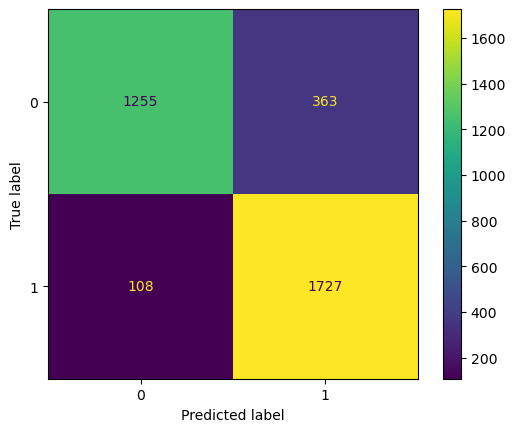

In [10]:
predictions = ert.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

In [ ]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

In [ ]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

## AdaBoost

In [30]:
param_grid = {'n_estimators': np.arange(1, 200, 5),
              'learning_rate': [0.0, 0.1, 0.2, 0.5, 0.01, 0.05, 0.001],
              'algorithm': ['SAMME', 'SAMME.R'],
             }

ada = AdaBoostClassifier()

grid = GridSearchCV(
    ada,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits
[CV 1/3] END algorithm=SAMME, learning_rate=0.0, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END algorithm=SAMME, learning_rate=0.0, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END algorithm=SAMME, learning_rate=0.0, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END algorithm=SAMME, learning_rate=0.0, n_estimators=6;, score=nan total time=   0.0s
[CV 2/3] END algorithm=SAMME, learning_rate=0.0, n_estimators=6;, score=nan total time=   0.0s
[CV 3/3] END algorithm=SAMME, learning_rate=0.0, n_estimators=6;, score=nan total time=   0.0s
[CV 1/3] END algorithm=SAMME, learning_rate=0.0, n_estimators=11;, score=nan total time=   0.0s
[CV 2/3] END algorithm=SAMME, learning_rate=0.0, n_estimators=11;, score=nan total time=   0.0s
[CV 3/3] END algorithm=SAMME, learning_rate=0.0, n_estimators=11;, score=nan total time=   0.0s
[CV 1/3] END algorithm=SAMME, learning_rate=0.0, n_estimators=16;, score=nan t

[CV 3/3] END algorithm=SAMME, learning_rate=0.0, n_estimators=196;, score=nan total time=   0.0s
[CV 1/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=1;, score=0.860 total time=   0.0s
[CV 2/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=1;, score=0.848 total time=   0.0s
[CV 3/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=1;, score=0.858 total time=   0.0s
[CV 1/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=6;, score=0.860 total time=   0.1s
[CV 2/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=6;, score=0.848 total time=   0.1s
[CV 3/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=6;, score=0.858 total time=   0.0s
[CV 1/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=11;, score=0.860 total time=   0.1s
[CV 2/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=11;, score=0.848 total time=   0.1s
[CV 3/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=11;, score=0.858 total time=   0.1s
[CV 1/3] END algorithm=SAMM

[CV 3/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=136;, score=0.858 total time=   1.1s
[CV 1/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=141;, score=0.860 total time=   1.2s
[CV 2/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=141;, score=0.848 total time=   1.2s
[CV 3/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=141;, score=0.858 total time=   1.2s
[CV 1/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=146;, score=0.860 total time=   1.2s
[CV 2/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=146;, score=0.848 total time=   1.2s
[CV 3/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=146;, score=0.858 total time=   1.2s
[CV 1/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=151;, score=0.860 total time=   1.3s
[CV 2/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=151;, score=0.848 total time=   1.3s
[CV 3/3] END algorithm=SAMME, learning_rate=0.1, n_estimators=151;, score=0.858 total time=   1.2s
[CV 1/3] E

[CV 3/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=76;, score=0.858 total time=   0.6s
[CV 1/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=81;, score=0.860 total time=   0.7s
[CV 2/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=81;, score=0.848 total time=   0.7s
[CV 3/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=81;, score=0.892 total time=   0.7s
[CV 1/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=86;, score=0.860 total time=   0.7s
[CV 2/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=86;, score=0.848 total time=   0.8s
[CV 3/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=86;, score=0.892 total time=   0.8s
[CV 1/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=91;, score=0.860 total time=   0.8s
[CV 2/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=91;, score=0.848 total time=   0.8s
[CV 3/3] END algorithm=SAMME, learning_rate=0.2, n_estimators=91;, score=0.892 total time=   0.8s
[CV 1/3] END algorit

[CV 1/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=21;, score=0.860 total time=   0.2s
[CV 2/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=21;, score=0.848 total time=   0.2s
[CV 3/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=21;, score=0.858 total time=   0.1s
[CV 1/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=26;, score=0.860 total time=   0.2s
[CV 2/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=26;, score=0.848 total time=   0.2s
[CV 3/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=26;, score=0.858 total time=   0.2s
[CV 1/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=31;, score=0.903 total time=   0.3s
[CV 2/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=31;, score=0.890 total time=   0.2s
[CV 3/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=31;, score=0.892 total time=   0.2s
[CV 1/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=36;, score=0.903 total time=   0.3s
[CV 2/3] END algorit

[CV 1/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=161;, score=0.903 total time=   1.3s
[CV 2/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=161;, score=0.891 total time=   1.4s
[CV 3/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=161;, score=0.892 total time=   1.3s
[CV 1/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=166;, score=0.903 total time=   1.5s
[CV 2/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=166;, score=0.891 total time=   1.4s
[CV 3/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=166;, score=0.892 total time=   1.4s
[CV 1/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=171;, score=0.903 total time=   1.4s
[CV 2/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=171;, score=0.891 total time=   1.5s
[CV 3/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=171;, score=0.892 total time=   1.4s
[CV 1/3] END algorithm=SAMME, learning_rate=0.5, n_estimators=176;, score=0.903 total time=   1.6s
[CV 2/3] E

[CV 3/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=96;, score=0.858 total time=   0.8s
[CV 1/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=101;, score=0.860 total time=   0.8s
[CV 2/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=101;, score=0.848 total time=   0.8s
[CV 3/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=101;, score=0.858 total time=   0.8s
[CV 1/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=106;, score=0.860 total time=   0.9s
[CV 2/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=106;, score=0.848 total time=   0.9s
[CV 3/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=106;, score=0.858 total time=   0.9s
[CV 1/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=111;, score=0.860 total time=   0.9s
[CV 2/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=111;, score=0.848 total time=   0.9s
[CV 3/3] END algorithm=SAMME, learning_rate=0.01, n_estimators=111;, score=0.858 total time=   0.9s
[

[CV 2/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=36;, score=0.848 total time=   0.3s
[CV 3/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=36;, score=0.858 total time=   0.3s
[CV 1/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=41;, score=0.860 total time=   0.3s
[CV 2/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=41;, score=0.848 total time=   0.3s
[CV 3/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=41;, score=0.858 total time=   0.3s
[CV 1/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=46;, score=0.860 total time=   0.4s
[CV 2/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=46;, score=0.848 total time=   0.4s
[CV 3/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=46;, score=0.858 total time=   0.4s
[CV 1/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=51;, score=0.860 total time=   0.4s
[CV 2/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=51;, score=0.848 total time=   0.4s
[CV 3/3] E

[CV 1/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=176;, score=0.860 total time=   1.4s
[CV 2/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=176;, score=0.848 total time=   1.5s
[CV 3/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=176;, score=0.858 total time=   1.7s
[CV 1/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=181;, score=0.860 total time=   1.5s
[CV 2/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=181;, score=0.848 total time=   1.5s
[CV 3/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=181;, score=0.858 total time=   1.5s
[CV 1/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=186;, score=0.860 total time=   1.5s
[CV 2/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=186;, score=0.848 total time=   1.4s
[CV 3/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=186;, score=0.858 total time=   1.5s
[CV 1/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=191;, score=0.860 total time=   1.7s


[CV 2/3] END algorithm=SAMME, learning_rate=0.001, n_estimators=111;, score=0.848 total time=   0.9s
[CV 3/3] END algorithm=SAMME, learning_rate=0.001, n_estimators=111;, score=0.858 total time=   0.9s
[CV 1/3] END algorithm=SAMME, learning_rate=0.001, n_estimators=116;, score=0.860 total time=   1.0s
[CV 2/3] END algorithm=SAMME, learning_rate=0.001, n_estimators=116;, score=0.848 total time=   0.9s
[CV 3/3] END algorithm=SAMME, learning_rate=0.001, n_estimators=116;, score=0.858 total time=   1.0s
[CV 1/3] END algorithm=SAMME, learning_rate=0.001, n_estimators=121;, score=0.860 total time=   1.0s
[CV 2/3] END algorithm=SAMME, learning_rate=0.001, n_estimators=121;, score=0.848 total time=   1.0s
[CV 3/3] END algorithm=SAMME, learning_rate=0.001, n_estimators=121;, score=0.858 total time=   1.1s
[CV 1/3] END algorithm=SAMME, learning_rate=0.001, n_estimators=126;, score=0.860 total time=   1.0s
[CV 2/3] END algorithm=SAMME, learning_rate=0.001, n_estimators=126;, score=0.848 total tim

[CV 3/3] END algorithm=SAMME.R, learning_rate=0.0, n_estimators=171;, score=nan total time=   0.0s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.0, n_estimators=176;, score=nan total time=   0.0s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.0, n_estimators=176;, score=nan total time=   0.0s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.0, n_estimators=176;, score=nan total time=   0.0s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.0, n_estimators=181;, score=nan total time=   0.0s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.0, n_estimators=181;, score=nan total time=   0.0s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.0, n_estimators=181;, score=nan total time=   0.0s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.0, n_estimators=186;, score=nan total time=   0.0s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.0, n_estimators=186;, score=nan total time=   0.0s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.0, n_estimators=186;, score=nan total time=   0.0s
[CV 1/3] E

[CV 2/3] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=111;, score=0.892 total time=   1.0s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=111;, score=0.899 total time=   0.9s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=116;, score=0.907 total time=   1.0s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=116;, score=0.892 total time=   1.1s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=116;, score=0.899 total time=   1.2s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=121;, score=0.907 total time=   1.0s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=121;, score=0.892 total time=   1.3s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=121;, score=0.899 total time=   1.1s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=126;, score=0.907 total time=   1.1s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=126;, score=0.892 total tim

[CV 3/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=46;, score=0.898 total time=   0.3s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=51;, score=0.907 total time=   0.4s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=51;, score=0.893 total time=   0.4s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=51;, score=0.898 total time=   0.4s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=56;, score=0.907 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=56;, score=0.893 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=56;, score=0.898 total time=   0.4s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=61;, score=0.907 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=61;, score=0.893 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=61;, score=0.899 total time=   0.5s


[CV 1/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=186;, score=0.904 total time=   1.4s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=186;, score=0.892 total time=   1.4s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=186;, score=0.898 total time=   1.4s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=191;, score=0.904 total time=   1.4s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=191;, score=0.892 total time=   1.4s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=191;, score=0.898 total time=   1.4s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=196;, score=0.904 total time=   1.4s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=196;, score=0.892 total time=   1.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.2, n_estimators=196;, score=0.898 total time=   1.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=1;, score=0.860 total time=

[CV 2/3] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=121;, score=0.891 total time=   1.0s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=121;, score=0.898 total time=   1.2s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=126;, score=0.902 total time=   1.0s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=126;, score=0.891 total time=   1.1s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=126;, score=0.898 total time=   1.1s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=131;, score=0.901 total time=   1.2s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=131;, score=0.891 total time=   1.0s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=131;, score=0.898 total time=   1.0s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=136;, score=0.901 total time=   1.1s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=136;, score=0.891 total tim

[CV 3/3] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=56;, score=0.892 total time=   0.4s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=61;, score=0.903 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=61;, score=0.890 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=61;, score=0.892 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=66;, score=0.903 total time=   0.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=66;, score=0.890 total time=   0.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=66;, score=0.892 total time=   0.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=71;, score=0.903 total time=   0.6s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=71;, score=0.890 total time=   0.6s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=71;, score=0.892 total tim

[CV 3/3] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=191;, score=0.892 total time=   1.4s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=196;, score=0.903 total time=   1.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=196;, score=0.890 total time=   1.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=196;, score=0.892 total time=   1.5s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=1;, score=0.860 total time=   0.0s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=1;, score=0.848 total time=   0.0s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=1;, score=0.858 total time=   0.0s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=6;, score=0.903 total time=   0.1s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=6;, score=0.890 total time=   0.0s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=6;, score=0.892 total time=

[CV 3/3] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=126;, score=0.898 total time=   1.2s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=131;, score=0.905 total time=   1.2s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=131;, score=0.892 total time=   1.6s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=131;, score=0.898 total time=   1.3s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=136;, score=0.905 total time=   1.4s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=136;, score=0.892 total time=   1.3s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=136;, score=0.898 total time=   1.4s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=141;, score=0.905 total time=   1.5s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=141;, score=0.892 total time=   1.5s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=141;, score=0.898

[CV 3/3] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=61;, score=0.858 total time=   0.6s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=66;, score=0.860 total time=   0.8s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=66;, score=0.848 total time=   0.9s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=66;, score=0.858 total time=   0.8s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=71;, score=0.860 total time=   0.8s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=71;, score=0.848 total time=   0.7s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=71;, score=0.858 total time=   0.8s
[CV 1/3] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=76;, score=0.860 total time=   0.8s
[CV 2/3] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=76;, score=0.848 total time=   0.9s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=76;, score=0.858

[CV 2/3] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=196;, score=0.890 total time=   1.9s
[CV 3/3] END algorithm=SAMME.R, learning_rate=0.001, n_estimators=196;, score=0.892 total time=   2.2s


/Users/innocenzofulginiti/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 1680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/innocenzofulginiti/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/innocenzofulginiti/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "/Users/innocenzofulginiti/opt/anaconda3/lib/python3.9/site-packages/skle

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0, 0.1, 0.2, 0.5, 0.01, 0.05,
                                           0.001],
                         'n_estimators': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196])},
             scoring='accuracy', verbose=4)

In [31]:
ada = grid.best_estimator_

train_pred = ada.predict(train_set)
test_pred = ada.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.9000620732464308
Accuracy test set  0.8905299739357081
Precision train set  0.9156220514335149
Recall train set  0.9000620732464308
F1 score train set  0.8984114094790536
Support train set  (array([0.9989916 , 0.84212598]), array([0.78749338, 0.99929923]), array([0.88072307, 0.91400491]), array([3774, 4281]))


In [34]:
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       1.00      0.77      0.87      1618
         >50       0.83      1.00      0.91      1835

    accuracy                           0.89      3453
   macro avg       0.91      0.88      0.89      3453
weighted avg       0.91      0.89      0.89      3453



In [35]:
# cross validation
scores = cross_validate(ada, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.600115696589152
Score time  0.025362014770507812
Test score  0.899689633767846
Train score  0.9006207324643078


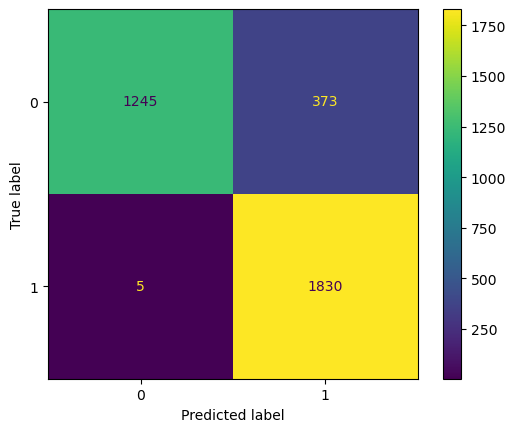

In [36]:
predictions = ada.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [39]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

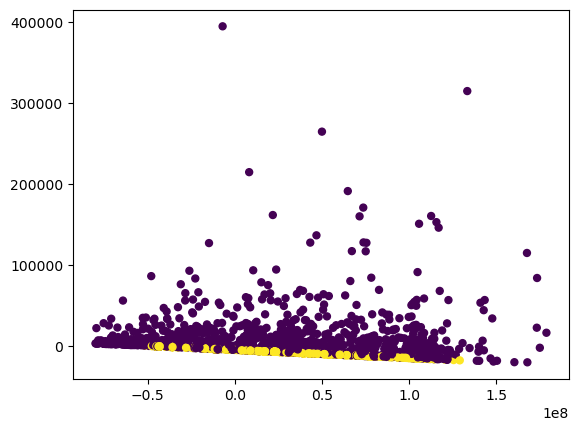

In [40]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

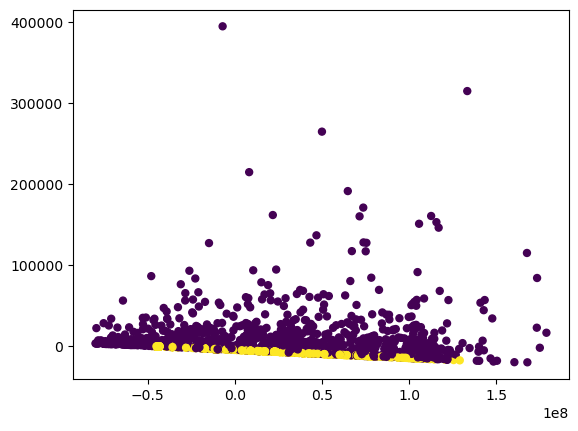

In [41]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

## Gradient Tree Boosting

In [15]:
gbc = GradientBoostingClassifier()

gbc.fit(train_set, train_label)

train_pred = gbc.predict(train_set)
test_pred = gbc.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.9045313469894476
Accuracy test set  0.9006660874601795
Precision train set  0.9179367424524781
Recall train set  0.9045313469894476
F1 score train set  0.9031371799314732
Support train set  (array([0.99538411, 0.84966149]), array([0.79994701, 0.99672974]), array([0.88702806, 0.91733849]), array([3774, 4281]))


In [16]:
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.99      0.80      0.88      1618
         >50       0.85      0.99      0.91      1835

    accuracy                           0.90      3453
   macro avg       0.92      0.89      0.90      3453
weighted avg       0.91      0.90      0.90      3453



In [17]:
# cross validation
scores = cross_validate(gbc, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  1.210301399230957
Score time  0.005061229070027669
Test score  0.8964618249534451
Train score  0.906455617628802


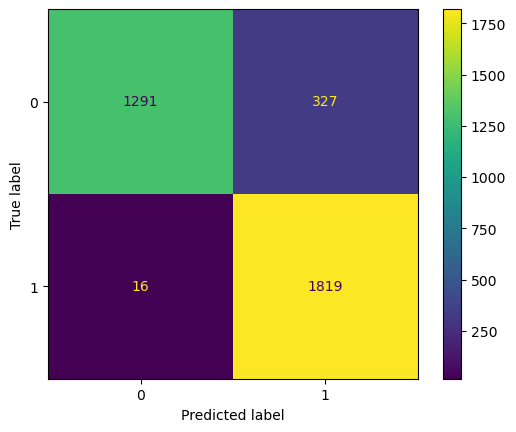

In [18]:
predictions = gbc.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

In [ ]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

In [ ]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

##  Histogram-Based Gradient Boosting

In [19]:
hgbc = HistGradientBoostingClassifier()

hgbc.fit(train_set, train_label)

train_pred = gbc.predict(train_set)
test_pred = gbc.predict(test_set)

print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.9045313469894476
Accuracy test set  0.9006660874601795
Precision train set  0.9179367424524781
Recall train set  0.9045313469894476
F1 score train set  0.9031371799314732
Support train set  (array([0.99538411, 0.84966149]), array([0.79994701, 0.99672974]), array([0.88702806, 0.91733849]), array([3774, 4281]))


In [20]:
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.99      0.80      0.88      1618
         >50       0.85      0.99      0.91      1835

    accuracy                           0.90      3453
   macro avg       0.92      0.89      0.90      3453
weighted avg       0.91      0.90      0.90      3453



In [21]:
# cross validation
scores = cross_validate(hgbc, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  3.7726755936940513
Score time  0.038790384928385414
Test score  0.8927374301675978
Train score  0.9713842333954066


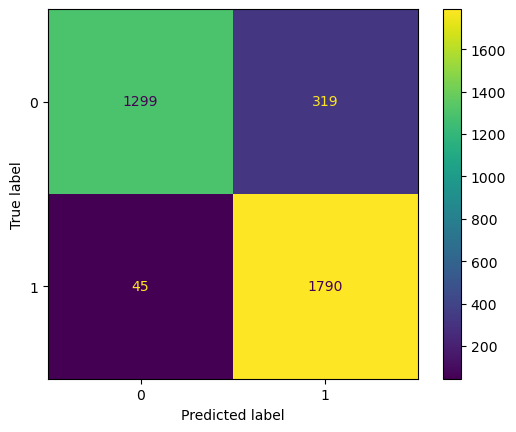

In [22]:
predictions = hgbc.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

In [ ]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

In [ ]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

## Save models

In [23]:
# TODO